## Reddit/Subreddit Comment Analysis for Stocks and Market Data

In [ ]:
#pip install needed libraries for Google Colab when you re-connect
! pip install emoji
! pip install praw
! pip install pyLDAvis

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 240.9/240.9 KB 3.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for emoji: filename=emoji-2.2.0-py3-none-any.whl size=234926 sha256=0617f93aa67383e9dbeb48321c8462f932031dc6ffee0f1295743d9eb12244eb
  Stored in directory: /root/.cache/pip/wheels/86/62/9e/a6b27a681abcde69970dbc0326ff51955f3beac72f15696984
Successfully built emoji
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 189.4/189.4 KB 3.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.9/55.9 KB 603.3 kB/s eta 0:00:00


In [ ]:
#! pip install pyLDAvis

Our research aims to gain insights into users' opinions on stocks and trading methods by analyzing popular stock and trading Reddit communities. To achieve this, we employed various techniques such as lexicon-based approaches, rule-based systems, and machine learning algorithms to perform sentiment analysis. Through our analysis, we examined the sentiment of comments in both individual subreddits and across all subreddits, which enabled us to gain insights into the dynamics of the subreddits and detect any changes in sentiment over time. We conducted sentiment analysis specifically on comments to better understand users' perspectives on specific companies and investment strategies. This allowed us to identify patterns and trends in user sentiment and develop a more comprehensive understanding of the sentiment landscape related to these topics.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
import praw
import os
import re
import nltk
import time
import random
import emoji
import pyLDAvis
import pyLDAvis.sklearn
import pyLDAvis.gensim_models
import warnings
warnings.filterwarnings("ignore")

from spacy.lang.en.stop_words import STOP_WORDS as stopwords
from string import punctuation
from string import punctuation
from collections import Counter, defaultdict
from wordcloud import WordCloud
from sklearn.decomposition import NMF, TruncatedSVD, LatentDirichletAllocation
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from spacy.lang.en.stop_words import STOP_WORDS as stopwords

from nltk.corpus import stopwords 
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
#import the reddit api key and secret api key
from reddit_key import api_key, api_key_secret

In [ ]:
user_agent = "Team 15"
reddit= praw.Reddit(
    client_id = api_key,
    client_secret= api_key_secret,
    user_agent = user_agent
)

NameError: ignored

In [ ]:
# Set the headers to emulate a web browser user agent
headers = {
    "User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/89.0.4389.82 Safari/537.36"
}
# Define the URL to scrape and get the page content with requests
url = "https://finance.yahoo.com/most-active/?count=50&offset=0"  
page = requests.get(url, headers=headers)
soup = BeautifulSoup(page.content, "html.parser")
# Extract the names of the 50 most active stocks
stock_names = [stock.text for stock in soup.find_all("a", {"data-test": "quoteLink"})]
print(stock_names)


To identify recent stock-related posts and increase the likelihood of selecting highly discussed stocks, we obtained our list of stocks from Yahoo's most active stock list

In [ ]:
#create list of stokc names to iterate through to find relevent posts
stock_names4 = ['TSLA', 'Tesla', 'Tesla Inc.', 'Tesla Corporation',
                'PLTR', 'Palantir', 'Palantir Technologies Inc.', 'Palantir Corporation',
                'F', 'Ford', 'Ford Motor', 'Ford Motor Company',
                'NVDA', 'Nvidia', 'Nvidia Corporation', 'AAPL', 'Apple', 'Apple Inc.',
                'AMZN', 'Amazon', 'Amazon.com Inc.', 'AMD', 'Advanced Micro Devices', 
                'GOOGL', 'Google', 'Alphabet Inc.',
                'NU', 'Northeast Utilities', 'ITUB',
                'Itau Unibanco Holding SA',
                'GOOG', 'Uber', 'Uber Technologies Inc.',
                'Uber Corporation',
                'MSFT', 'Microsoft', 'Microsoft Corporation',
                'NIO', 'Nio', 'Nio Inc.', 'Nio Corporation',
                'AMC', 'AMC Entertainment', 'AMC Entertainment Holdings Inc.',
                'CCL', 'Carnival', 'Carnival Corporation',
                'LUMN', 'Lumen', 'Lumen Technologies Inc.',
                'LYFT', 'Lyft', 'Lyft Inc.', 'Lyft Corporation',
                'SNAP', 'Snap', 'Snap Inc.',
                'BAC', 'Bank of America', 'Bank of America Corporation',
                'SOFI', 'SoFi', 'SoFi Technologies Inc.',
                'ABEV', 'AmBev', 'AmBev SA',
                'BBD', 'Bombardier', 'Bombardier Inc.',
                'INTC', 'Intel', 'Intel Corporation',
                'AI', 'Arlington', 'Arlington Asset Investment Corp.',
                'CS', 'Credit Suisse', 'Credit Suisse Group AG',
                'APE', 'Apeel', 'Apeel Sciences Inc.',
                'META', 'Metamaterial', 'Metamaterial Inc.',
                'COIN', 'Coinbase', 'Coinbase Global Inc.',
                'T', 'AT&T', 'AT&T Inc.',
                'AFRM', 'Affirm', 'Affirm Holdings Inc.',
                'SWN', 'Southwestern', 'Southwestern Energy Company',
                'CLF', 'Cleveland', 'Cleveland-Cliffs Inc.', 
                'DNA', 'Sphereon', 'Sphere 3D Corp.', 'GOLD',
                'Barrick', 'Barrick Gold Corporation',
                'GRAB', 'Grab', 'Grab Holdings Inc.',
                'CSCO', 'Cisco', 'Cisco Systems Inc.',
                'PYPL', 'PayPal', 'PayPal Holdings Inc.',
                'SHOP', 'Shopify', 'Shopify Inc.',
                'CMCSA', 'Comcast', 'Comcast Corporation',
                'LCID', 'Lucid', 'Lucid Group Inc.',
                'BTG', 'B2Gold', 'B2Gold Corp.',
                'KO', 'Coca-Cola', 'The Coca-Cola Company',
                'PFE', 'Pfizer', 'Pfizer Inc.',
                'AAL', 'American Airlines', 'American Airlines Group Inc.',
                'BTU', 'Peabody', 'Peabody Energy Corporation',
                'RIVN', 'Rivian', 'Rivian Automotive Inc.',
                'WFC', 'Wells Fargo', 'Wells Fargo & Company',
                'C', 'Citigroup', 'Citigroup Inc.',
                'PBR', 'Petrobras', 'Petroleo Brasileiro SA']

In [ ]:
#create list of subreddit names to search through 
subreddits = ['stockmarket', 'investing', 'wallstreetbets',
              'Wallstreetbetsnew','WallStreetbetsELITE',
              'stocks','StockMarket','investing',
              'SPACs', 'options','Daytrading','Shortsqueeze',
              'SqueezePlays']

Using PRAW library we searched subreddits that mentioned any of the 50 stocks, extracted post (headlines, comments, stock name, subreddit name, and comment and post scores into a dictionary.

In [ ]:
# Define regular expression pattern to match stock symbols
symbol_pattern = re.compile(r'\b(' + '|'.join(stock_names4) + r')\b', re.IGNORECASE)

data = {}
seen_headlines = set()
start_time = time.time()

for subreddit in subreddits:
    for post_type in ['hot', 'new']:
        for submission in reddit.subreddit(subreddit).__getattribute__(post_type)(limit=None):
            if submission.title not in seen_headlines and symbol_pattern.search(submission.title):
                seen_headlines.add(submission.title)
                headline_data = {
                    'headline': submission.title,
                    'headline_score': submission.score,
                    'stock_name': symbol_pattern.search(submission.title).group(0),
                    'subreddit_name': subreddit,
                    'comments': []
                }
                submission.comments.replace_more(limit=0)
                comment_counter = 0
                for comment in submission.comments.list():
                    if comment.body and comment.score:
                        headline_data['comments'].append({
                            'comment': comment.body,
                            'comment_score': comment.score
                        })
                        comment_counter += 1
                        if comment_counter >= 50:
                            break
                data[submission.title] = headline_data

end_time = time.time()
run_time = end_time - start_time
print(f"Code run time: {run_time} seconds")


Code run time: 2513.3156411647797 seconds


In [ ]:
# Convert the dictionary to a DataFrame
df = pd.DataFrame.from_dict(data, orient='index')


In [ ]:
df = df.reset_index(drop=True)
df

,headline,headline_score,stock_name,subreddit_name,comments
0,"Al Gore’s Firm Sells Alibaba Stock, TSMC, and ...",81,Shopify,stockmarket,[{'comment': 'Shopify was able to add more tha...
1,Tesla trade based on it's own historical data,10,Tesla,stockmarket,[{'comment': 'Are sure you did not write a ver...
2,What SHOP Won't Do – Probably,4,SHOP,stockmarket,[{'comment': 'This looks like a great way to a...
3,OpenAI was revealed to have bought the AI.com ...,0,AI,stockmarket,[{'comment': 'I feel like the ai has signed it...
4,META Summarized News for the week [Feb 19],3,META,stockmarket,[]
...,...,...,...,...,...
1101,$APRN going to $15+ soon. Don't be bagholding ...,63,t,SqueezePlays,"[{'comment': 'Cashed out at $6.20 today, is it..."
1102,Joseph Sandberg isn't going to rugpull retail ...,28,t,SqueezePlays,[{'comment': '🚀🚀 squeezes coming.. people will...
1103,"People say fundamentally, the $BBBY play hasn'...",39,t,SqueezePlays,[{'comment': 'It’ll probably get pumped slight...
1104,"$BBBY on Reg Sho. ""Volume has been way too hig...",92,t,SqueezePlays,"[{'comment': 'Per u/emlerith: ""No shorting and..."


After further analyzing the Reddit Data we noticed a need for filtering spam and moderator comments.

In [ ]:
# Create an empty dictionary to store the comments and their frequency
comment_freq = {}

# Loop through all comments in the list of lists
for comments in df['comments']:
    for comment in comments:
        # Convert the comment dictionary to a tuple to make it hashable
        comment_tuple = tuple(comment.items())
        
        # Check if the comment is already in the dictionary
        if comment_tuple in comment_freq:
            # If it is, increment the frequency by 1
            comment_freq[comment_tuple] += 1
        else:
            # If it is not, add the comment to the dictionary with a frequency of 1
            comment_freq[comment_tuple] = 1

# Sort the comments by frequency in descending order
sorted_comments = sorted(comment_freq.items(), key=lambda x: x[1], reverse=True)

# Print the comments and their frequencies
#for comment, freq in sorted_comments:
#    print(comment, freq)


NameError: ignored

With the comment frequencies we noticed which comments were spam or bot comments and made a txt file to begin to filter these comments out.

In [ ]:
#load in the spam comment txt to remove them from our data.
with open('spam_comments.txt', 'r',encoding='utf-8') as f:
        s_comments = [line.strip() for line in f.readlines()]


In [ ]:
spam_list_comments = [s_comments]

In [ ]:
# Create an empty dictionary to store the comments and their frequency
comment_freq = {}

# Loop through all comments in the list of lists
for comments in df['comments']:
    for comment in comments:
        # Convert the comment dictionary to a tuple to make it hashable
        comment_tuple = tuple(comment.items())
        
        # Check if the comment is already in the dictionary
        if comment_tuple in comment_freq:
            # If it is, increment the frequency by 1
            comment_freq[comment_tuple] += 1
        else:
            # If it is not, add the comment to the dictionary with a frequency of 1
            comment_freq[comment_tuple] = 1

# Replace comments with frequency higher than 15 or in the spam list, or that contain "\n**User Report**| | | |" with an empty string
for i, comments in enumerate(df['comments']):
    for j, comment in enumerate(comments):
        # Convert the comment dictionary to a tuple to make it hashable
        comment_tuple = tuple(comment.items())
        
        # Check if the comment has a frequency higher than 15, is in the spam list, or contains "\n**User Report**| | | |"
        if comment_freq[comment_tuple] > 15 or [comment] in spam_list_comments or "\n**User Report**| | | |" in [comment]:
            # If it does, replace the comment with an empty string
            df['comments'][i][j] = " "

# Print the updated comments
print(df['comments'])



0       [{'comment': 'Shopify was able to add more tha...
1       [{'comment': 'Are sure you did not write a ver...
2       [{'comment': 'This looks like a great way to a...
3       [{'comment': 'I feel like the ai has signed it...
4                                                      []
                              ...                        
1101    [{'comment': 'Cashed out at $6.20 today, is it...
1102    [{'comment': '🚀🚀 squeezes coming.. people will...
1103    [{'comment': 'It’ll probably get pumped slight...
1104    [{'comment': 'Per u/emlerith: "No shorting and...
1105         [{'comment': 'Bullish', 'comment_score': 1}]
Name: comments, Length: 1106, dtype: object


In [ ]:
#number of comments users reported as comment or post already seen in the past, some contain commentary or opinions 
num_reports = 0

for comments in df['comments']:
    for comment in comments:
        if "**User Report**" in str(comment):
            num_reports += 1
            

print(num_reports)



177


In [ ]:
#total number of comments found in all subreddits/posts
num_comments = 0
for comments in df['comments']:
    num_comments += len(comments)
print(num_comments)

21281


In [ ]:
df.to_csv('reddit_data.csv', index_label=None, encoding='utf-8')

For our data collection, we obtained information from Yahoo's top 50 daily stocks, as well as several subreddits that focused on stock and trading topics. We extracted various data points such as headlines, comments, comment scores, headline scores, stock names, and subreddit names. After removing spam and bot comments, we were left with a total of 1,106 headlines and 21,281 comments. To ensure version control and facilitate collaboration among team members, we stored the resulting data frame as a CSV file

*****

In [ ]:
#connect to google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
data = pd.read_csv("/content/reddit_data.csv", header=0) # AMIN's Import
#data = pd.DataFrame(data)
print(data.shape)
data.head()

(1106, 6)


,Unnamed: 0,headline,headline_score,stock_name,subreddit_name,comments
0,0,"Al Gore’s Firm Sells Alibaba Stock, TSMC, and ...",81,Shopify,stockmarket,[{'comment': 'Shopify was able to add more tha...
1,1,Tesla trade based on it's own historical data,10,Tesla,stockmarket,[{'comment': 'Are sure you did not write a ver...
2,2,What SHOP Won't Do – Probably,4,SHOP,stockmarket,"[{'comment': ""This looks like a great way to a..."
3,3,OpenAI was revealed to have bought the AI.com ...,0,AI,stockmarket,"[{'comment': ""I feel like the ai has signed it..."
4,4,META Summarized News for the week [Feb 19],3,META,stockmarket,[]


In [ ]:
#from data source in google drive, import the saved reddit download
data = pd.read_csv("/content/drive/My Drive/reddit_data_updated.csv", header=0)
print(data.shape)
data.head()

(1106, 6)


,Unnamed: 0,headline,headline_score,stock_name,subreddit_name,comments
0,0,"Al Gore’s Firm Sells Alibaba Stock, TSMC, and ...",81,Shopify,stockmarket,[{'comment': 'Shopify was able to add more tha...
1,1,Tesla trade based on it's own historical data,10,Tesla,stockmarket,[{'comment': 'Are sure you did not write a ver...
2,2,What SHOP Won't Do – Probably,4,SHOP,stockmarket,"[{'comment': ""This looks like a great way to a..."
3,3,OpenAI was revealed to have bought the AI.com ...,0,AI,stockmarket,"[{'comment': ""I feel like the ai has signed it..."
4,4,META Summarized News for the week [Feb 19],3,META,stockmarket,[]


### Create the tokenization functions

In [ ]:
# Some punctuation variations
punctuation = set(punctuation) # speeds up comparison
tw_punct = punctuation - {"#"}

# Stopwords
add_stopwords = ['comment', 'comment_score','commentscore','comment score']
sw = stopwords.words("english")
#sw.extend(new_stopwords)

# Two useful regex
whitespace_pattern = re.compile(r"\s+")
hashtag_pattern = re.compile(r"^#[0-9a-zA-Z]+")

#find the count of emojis within the dataframe
def contains_emoji(s):
    s = str(s)
    emojis = [ch for ch in s if emoji.is_emoji(ch)]
    return(len(emojis) > 0)

#remove the stop workds from the dataframe
def remove_stop(tokens) :
    stop_words = set(stopwords.words("english"))
    stop_words.update(add_stopwords)
    return [word for word in tokens if word.lower() not in stop_words]
 
#remove the punctuation from the dataframe
def remove_punctuation(text, punct_set=tw_punct) : 
    return("".join([ch for ch in text if ch not in punct_set]))

#create the tokens by splitting on whitespace
def tokenize(text) : 
    """ Splitting on whitespace rather than the book's tokenize function. That 
        function will drop tokens like '#hashtag' or '2A', which we need for Twitter. """
    return re.split(whitespace_pattern, text)

#defind the function for preparing the data for the pipeline
def prepare(text, pipeline) : 
    tokens = str(text)
    
    for transform in pipeline : 
        tokens = transform(tokens)
        
    return(tokens)

In [ ]:
#apply the pipeline to the reddit dataframe
reddit_pipeline = [str.lower, remove_punctuation, tokenize, remove_stop]

#create the tokens column and the number of tokens per column
data["tokens"] = data["comments"].apply(prepare,pipeline= reddit_pipeline)
data["num_tokens"] = data["tokens"].map(len) 
data['has_emoji'] = data["comments"].apply(contains_emoji)
data.head()

,Unnamed: 0,headline,headline_score,stock_name,subreddit_name,comments,tokens,num_tokens,has_emoji
0,0,"Al Gore’s Firm Sells Alibaba Stock, TSMC, and ...",81,Shopify,stockmarket,[{'comment': 'Shopify was able to add more tha...,"[shopify, able, add, 100, million, cash, holdi...",188,False
1,1,Tesla trade based on it's own historical data,10,Tesla,stockmarket,[{'comment': 'Are sure you did not write a ver...,"[sure, write, vertical, call, spread, instead,...",435,False
2,2,What SHOP Won't Do – Probably,4,SHOP,stockmarket,"[{'comment': ""This looks like a great way to a...","[looks, like, great, way, analyze, stock, sell...",124,False
3,3,OpenAI was revealed to have bought the AI.com ...,0,AI,stockmarket,"[{'comment': ""I feel like the ai has signed it...","[feel, like, ai, signed, reddit, account, post...",42,False
4,4,META Summarized News for the week [Feb 19],3,META,stockmarket,[],[],1,False


### Create the descriptive statistics functions

In [ ]:
#create the descriptive statistics function
def descriptive_stats(tokens, num_tokens = 5, verbose=True) :

    total_types = []
    true_total = []
    num_tokens = 0
    num_unique_tokens = 0
    lexical_diversity = 0.0
    num_characters = 0

    #get unique list of tokens
    for token in tokens:
        #print(token)
        for i in token:
            true_total.append(i)
            num_tokens += 1
            if i in total_types:
                pass
            else:
                total_types.append(i)
                num_unique_tokens += 1
            for character in i:
                num_characters +=1
                
    lexical_diversity = round(num_unique_tokens / num_tokens , 3)
                
    if verbose :        
        print(f"There are {num_tokens} tokens in the data.")
        print(f"There are {num_unique_tokens} unique tokens in the data.")
        print(f"There are {num_characters} characters in the data.")
        print(f"The lexical diversity is {lexical_diversity:.3f} in the data.")    

    #collect the 5 most common tokens
    counter_list = Counter(true_total)
    top_5 = counter_list.most_common(5)
    print(top_5)

    return([num_tokens, num_unique_tokens,lexical_diversity,num_characters])

In [ ]:
#return the descriptive stats for the reddit data (tokens column)
descriptive_stats(data['tokens'])

There are 364556 tokens in the data.
There are 32426 unique tokens in the data.
There are 2125542 characters in the data.
The lexical diversity is 0.089 in the data.
[('1', 7691), ('2', 4387), ('like', 2590), ('3', 2433), ('would', 1781)]


[364556, 32426, 0.089, 2125542]

<AxesSubplot:title={'center':'Average Comment Length by Subreddit'}, xlabel='subreddit_name'>

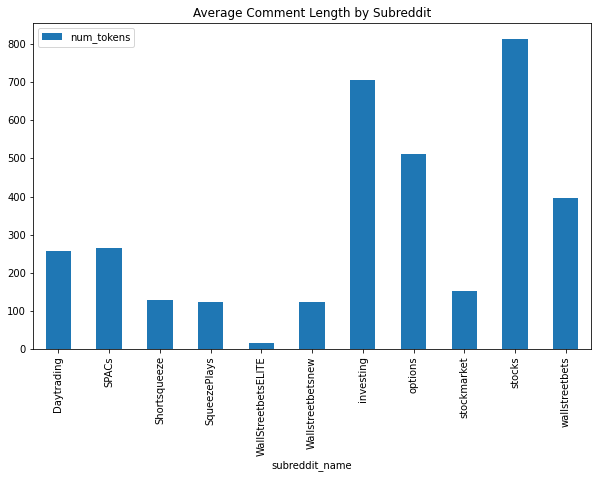

In [ ]:
#view the mean wordcount by subreddit
%matplotlib inline
data.groupby('subreddit_name').agg({'num_tokens': 'mean'}).plot.bar(figsize=(10,6), title = "Average Comment Length by Subreddit")

Individual subreddits have a wide range of comment length. Specifically, the WallStreetbetsELITE has the viewest, and stocks has the most. With respect to reading comments that have more substance (not neccessarily value), it is assumed that stocks and investing have more depth to their posts, whereas some of the others are more conversational and have less substance. 

### Wordcloud build

##### Create the wordcloud function

In [ ]:
#create word clouds by subreddit
from matplotlib import pyplot as plt

def wordcloud(word_freq, title=None, max_words=200, stopwords=None):

    wc = WordCloud(width=800, height=400, 
                   background_color= "black", colormap="Paired", 
                   max_font_size=150, max_words=max_words)
    
    # convert data frame into dict
    if type(word_freq) == pd.Series:
        counter = Counter(word_freq.fillna(0).to_dict())
    else:
        counter = word_freq

    # filter stop words in frequency counter
    if stopwords is not None:
        counter = {token:freq for (token, freq) in counter.items() 
                              if token not in stopwords}
    wc.generate_from_frequencies(counter)
 
    plt.title(title) 

    plt.imshow(wc, interpolation='bilinear')
    plt.axis("off")

In [ ]:
#udpated count_words function that removes numbers 1 -10, so that wordclouds are more intuitive to the words being used
def count_words(df, column='tokens', preprocess=None, min_freq=2):
    #process tokens and update counter
    def update(doc):
        tokens = doc if preprocess is None else preprocess(doc)
        #remove tokens that are numbers 1 through 10
        tokens = [t for t in tokens if not (t.isdigit() and 1 <= int(t) <= 10)]
        counter.update(tokens)

    #create counter and run through all data
    counter = Counter()
    df[column].map(update)

    #transform counter into data frame
    freq_df = pd.DataFrame.from_dict(counter, orient='index', columns=['freq'])
    freq_df = freq_df.query('freq >= @min_freq')
    freq_df.index.name = 'token'

    return freq_df.sort_values('freq', ascending=False)

##### wordcloud data prep (create individual df's by subreddit)

In [ ]:
#create the total reddit wordcloud
reddit_cloud = count_words(data)

#create individual subreddit dataframes
df_wallstreetbets = data[data['subreddit_name'] == 'wallstreetbets'].copy()
df_stockmarket = data[data['subreddit_name'] == 'stockmarket'].copy()
df_daytrading = data[data['subreddit_name'] == 'Daytrading'].copy()
df_spacs = data[data['subreddit_name'] == 'SPACs'].copy()
df_shortsqueeze = data[data['subreddit_name'] == 'Shortsqueeze'].copy()
df_squeezeplays= data[data['subreddit_name'] == 'SqueezePlays'].copy()
df_wallstbets_elite = data[data['subreddit_name'] == 'WallStreetbetsELITE'].copy()
df_wallstreetbets_new = data[data['subreddit_name'] == 'Wallstreetbetsnew'].copy()
df_investing= data[data['subreddit_name'] == 'investing'].copy()
df_options = data[data['subreddit_name'] == 'options'].copy()
df_stocks = data[data['subreddit_name'] == 'stocks'].copy()

#create the count of words by each subreddit
wallst_cloud = count_words(df_wallstreetbets)
stockmk_cloud = count_words(df_stockmarket)
daytrade_cloud = count_words(df_daytrading)
spacs_cloud = count_words(df_spacs)
shortsqueeze_cloud = count_words(df_shortsqueeze)
squeezeplays_cloud = count_words(df_squeezeplays)
wallstbets_elite_cloud = count_words(df_wallstbets_elite)
wallstreetbets_new_cloud = count_words(df_wallstreetbets_new)
investing_cloud = count_words(df_investing)
options_cloud = count_words(df_options)
stocks_cloud = count_words(df_stocks)

In [ ]:
#stocks_cloud.head()

#### Unique wordclouds by subreddit
Note: The first wordcloud is the entire dataframe, and the next two are the subreddits that have the most and the least length of tokens in their comments. 

##### Total Reddit Wordcloud

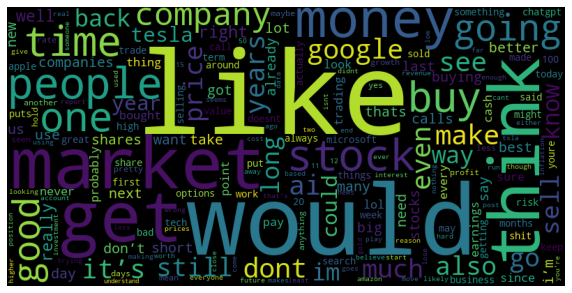

In [ ]:
#make the wordcloud larger for better vizability (all subreddits included)
wordcloud = WordCloud(width=800, height=400).generate_from_frequencies(reddit_cloud['freq'])

plt.figure(figsize=(10,10))
plt.imshow(wordcloud)#, interpolation='bilinear')
plt.axis('off')
plt.show()

##### Stocks Subreddit Wordcloud

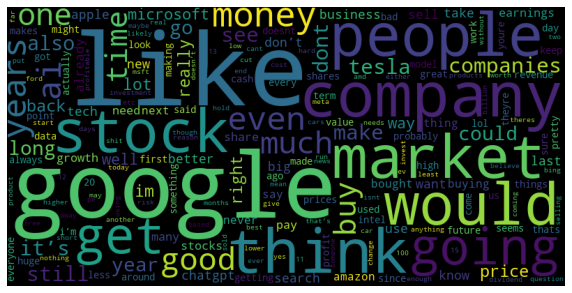

In [ ]:
#stocks - most number of words used
wordcloud = WordCloud(width=800, height=400).generate_from_frequencies(stocks_cloud['freq'])

plt.figure(figsize=(10,10))
plt.imshow(wordcloud)#, interpolation='bilinear')
plt.axis('off')
plt.show()

##### Wallstreetbets Elite Subreddit Wordcloud

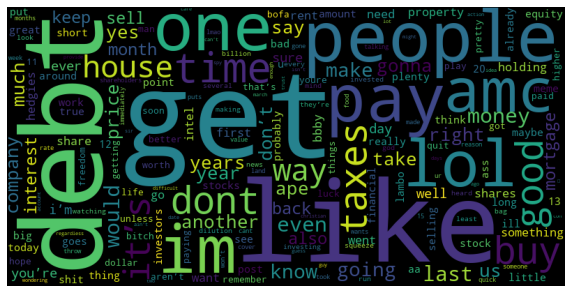

In [ ]:
#wallstreetbets_elite - fewest number of words used
wordcloud = WordCloud(width=800, height=400).generate_from_frequencies(wallstbets_elite_cloud['freq'])

plt.figure(figsize=(10,10))
plt.imshow(wordcloud)#, interpolation='bilinear')
plt.axis('off')
plt.show()

##### Wallstreetbets Subreddit Wordcloud

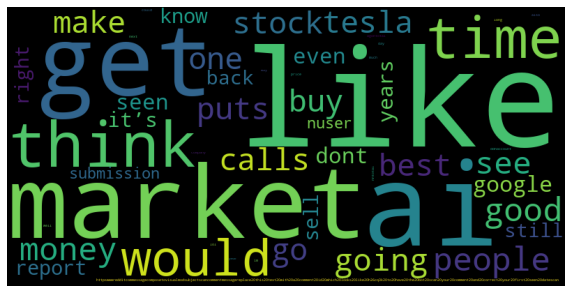

In [ ]:
#wallstreetbets wordcloud
wordcloud = WordCloud(width=800, height=400).generate_from_frequencies(wallst_cloud['freq'])

plt.figure(figsize=(10,10))
plt.imshow(wordcloud)#, interpolation='bilinear')
plt.axis('off')
plt.show()

##### Stockmarket Subreddit Wordcloud

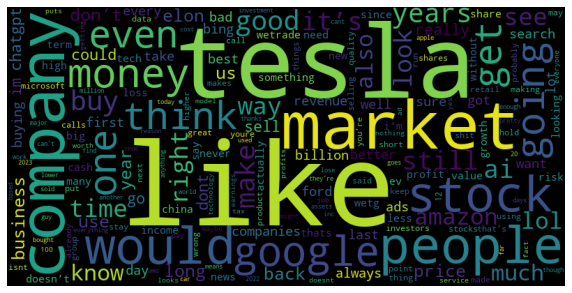

In [ ]:
#stockmarket wordcloud
wordcloud = WordCloud(width=800, height=400).generate_from_frequencies(stockmk_cloud['freq'])

plt.figure(figsize=(10,10))
plt.imshow(wordcloud)#, interpolation='bilinear')
plt.axis('off')
plt.show()

##### Daytrade Subreddit Wordcloud

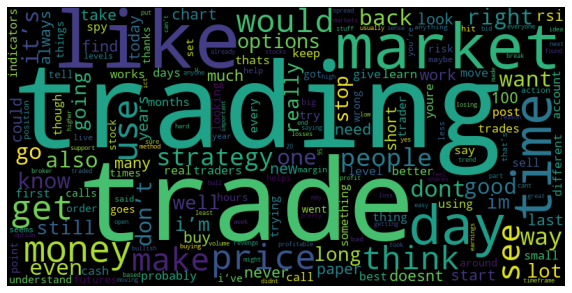

In [ ]:
#daytrade wordcloud
wordcloud = WordCloud(width=800, height=400).generate_from_frequencies(daytrade_cloud['freq'])

plt.figure(figsize=(10,10))
plt.imshow(wordcloud)#, interpolation='bilinear')
plt.axis('off')
plt.show()

##### Spacs Subreddit Wordcloud

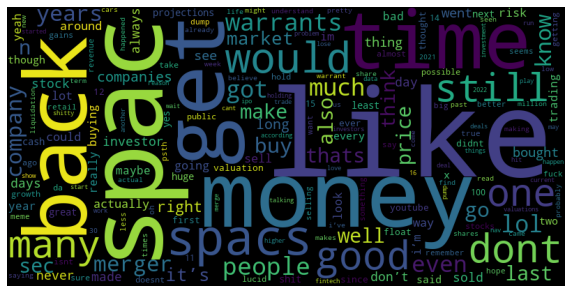

In [ ]:
#spacs wordcloud
wordcloud = WordCloud(width=800, height=400).generate_from_frequencies(spacs_cloud ['freq'])

plt.figure(figsize=(10,10))
plt.imshow(wordcloud)#, interpolation='bilinear')
plt.axis('off')
plt.show()

##### Shortsqueeze Subreddit Wordcloud

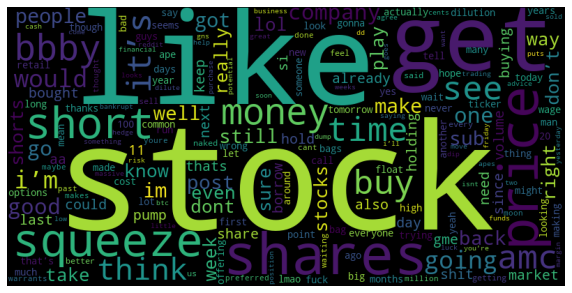

In [ ]:
#shortsqueeze wordcloud
wordcloud = WordCloud(width=800, height=400).generate_from_frequencies(shortsqueeze_cloud['freq'])

plt.figure(figsize=(10,10))
plt.imshow(wordcloud)#, interpolation='bilinear')
plt.axis('off')
plt.show()

### Naive Bayes Model:

#### Naive Bayes Data Prep

In [ ]:
#create a tokens variable from the cleaned tokens from the data dataframe and store to list
tokens = data['tokens'].tolist()

#create a flat list to decouple the list of lists
flat_list = []

#iterate through the token list and append flat list
for sublist in tokens:
    flat_list.extend(sublist)

#reassign teh flat_list variable to the token_list variable
token_list = flat_list

In [ ]:
def conv_features(text,fw) :
    result = {word: True for word in text if word in fw}

    return result

In [ ]:
#iterate through the convetion_df.token column and assign to list
for tokenlist in data.tokens.tolist():
    break

In [ ]:
#create a frequency list by token and establish the word cutoff limit
word_dist = nltk.FreqDist(token_list)
word_cutoff = 5

#create the list of words
feature_words = set()
for word, count in word_dist.items() :
    if count > word_cutoff :
        feature_words.add(word)

#view the number of features to be included in the Naive Bayes Model     
print(f"With a word cutoff of {word_cutoff}, we have {len(feature_words)} as features in the model.")

With a word cutoff of 5, we have 6012 as features in the model.


In [ ]:
#apply the conv_features function the our token list and feature workds
#conv_features(tokenlist, feature_words)

In [ ]:
#create the features column 
data['features'] = data["tokens"].apply(conv_features,fw=feature_words)
print(data.shape)
data.head()

(1106, 10)


,Unnamed: 0,headline,headline_score,stock_name,subreddit_name,comments,tokens,num_tokens,has_emoji,features
0,0,"Al Gore’s Firm Sells Alibaba Stock, TSMC, and ...",81,Shopify,stockmarket,[{'comment': 'Shopify was able to add more tha...,"[shopify, able, add, 100, million, cash, holdi...",188,False,"{'shopify': True, 'able': True, 'add': True, '..."
1,1,Tesla trade based on it's own historical data,10,Tesla,stockmarket,[{'comment': 'Are sure you did not write a ver...,"[sure, write, vertical, call, spread, instead,...",435,False,"{'sure': True, 'write': True, 'vertical': True..."
2,2,What SHOP Won't Do – Probably,4,SHOP,stockmarket,"[{'comment': ""This looks like a great way to a...","[looks, like, great, way, analyze, stock, sell...",124,False,"{'looks': True, 'like': True, 'great': True, '..."
3,3,OpenAI was revealed to have bought the AI.com ...,0,AI,stockmarket,"[{'comment': ""I feel like the ai has signed it...","[feel, like, ai, signed, reddit, account, post...",42,False,"{'feel': True, 'like': True, 'ai': True, 'sign..."
4,4,META Summarized News for the week [Feb 19],3,META,stockmarket,[],[],1,False,{'': True}


In [ ]:
#create the features sets list
feature_sets = []

#iterate through the f and collect the features and subreddit of each 
for i in range(data.shape[0]):
    feature_sets.append((data.iloc[i,9], data.iloc[i,4]))

In [ ]:
#view the feature_sets list
#feature_sets

#### Naive Bayes Model Test/Train/Split

In [ ]:
#shuffle the feature_sets and establish test size for test/training
random.seed(1234)
random.shuffle(feature_sets)

test_size = 300

In [ ]:
from nltk import NaiveBayesClassifier as classifier

In [ ]:
#create the test and train set
test_set, train_set = feature_sets[:test_size], feature_sets[test_size:]

#create the classifier for the Naive Bayes Classifier from the train set
classifier = nltk.NaiveBayesClassifier.train(train_set)

#print the accuracy of the classifier from the test set
print("The accuracy of the classifier on the test set is:", 100 * round(nltk.classify.accuracy(classifier, test_set),5), "%.")

The accuracy of the classifier on the test set is: 35.667 %.


In [ ]:
len(train_set)

806

While the accuracy of the classifier is generally poor, the most informative features can help to distinguish words that are used more within particular subreddits. However, caution should be used when making blanked assumptions, as the Wallstreetbets (wallst) subreddit has minimal words (see the wordcloud). Hence, the best comparisons are likley when compaired to subreddits that have more substance in their comments. 

In [ ]:
#show the top 50 most invormative features
classifier.show_most_informative_features(100)

Most Informative Features
                         = True            SPACs : wallst =     80.7 : 1.0
                       1 = None           WallSt : wallst =     77.3 : 1.0
              submission = True           wallst : stockm =     66.9 : 1.0
                    spac = True            SPACs : stockm =     56.1 : 1.0
                   could = True           stocks : WallSt =     54.2 : 1.0
                     lot = True           stocks : WallSt =     52.8 : 1.0
                     put = True           option : WallSt =     51.3 : 1.0
                   trade = True           option : WallSt =     48.7 : 1.0
                    need = True           stocks : WallSt =     47.9 : 1.0
                 already = True           stocks : WallSt =     46.5 : 1.0
                   close = True           option : WallSt =     46.0 : 1.0
                actually = True           stocks : WallSt =     45.8 : 1.0
                  better = True           stocks : WallSt =     45.8 : 1.0

### Topic Modeling - using LDA

In [ ]:
#data.head()

In [ ]:
#create two df's of stocks * wallstreetbets_elite (most and least length) in mean comment length
wallstreetbets_elite_data = data[data['subreddit_name'] == 'WallStreetbetsELITE'].copy()
stocks_data = data[data['subreddit_name'] == 'stocks'].copy()

print(wallstreetbets_elite_data.shape)
print(stocks_data.shape)

(149, 10)
(142, 10)


In [ ]:
from spacy.lang.en.stop_words import STOP_WORDS as stopwords

##### Prep the data for the LDA Model for all reddit data

In [ ]:
#count text vectors
count_text_vectorizer = CountVectorizer(stop_words=stopwords, min_df=5, max_df=0.7)
count_text_vectors = count_text_vectorizer.fit_transform(data["comments"])
print(count_text_vectors.shape)

(1106, 6117)


In [ ]:
#tfidf vectors
tfidf_text_vectorizer = TfidfVectorizer(stop_words=stopwords, min_df=5, max_df=0.7)
tfidf_text_vectors = tfidf_text_vectorizer.fit_transform(data['comments'])

##### Buld the LDA model on all reddit data

In [ ]:
#fit the LDA model
lda_text_model = LatentDirichletAllocation(n_components=5, random_state=1234)
W_lda_text_matrix = lda_text_model.fit_transform(count_text_vectors)
H_lda_text_matrix = lda_text_model.components_

In [ ]:
#function to display the topics from the LDA model 
def display_topics(model, features, no_top_words=3):
    for topic, words in enumerate(model.components_):
        total = words.sum()
        largest = words.argsort()[::-1] # invert sort order
        print("\nTopic %02d" % topic)
        for i in range(0, no_top_words):
            print("  %s (%2.2f)" % (features[largest[i]], abs(words[largest[i]]*100.0/total)))

In [ ]:
#call display topics on the LDA model for all Reddit data
display_topics(lda_text_model, tfidf_text_vectorizer.get_feature_names())


Topic 00
  like (0.90)
  stock (0.88)
  market (0.85)

Topic 01
  message (2.41)
  20your (1.93)
  https (1.57)

Topic 02
  google (2.35)
  ai (2.22)
  like (1.10)

Topic 03
  money (1.08)
  people (0.80)
  gold (0.79)

Topic 04
  tesla (1.15)
  company (1.01)
  like (0.92)


##### Build LDA Model on each individual Subreddit Data

In [ ]:
#total function that will return the topics by each subreddit
def generate_subreddit_topics(data):
    topics_dict = {}
    for subreddit in data["subreddit_name"].unique():
        subreddit_data = data[data["subreddit_name"] == subreddit]
        comments = subreddit_data["comments"]
        
        #create the count text vectors
        count_text_vectorizer = CountVectorizer(stop_words=stopwords, min_df=5, max_df=0.7)
        count_text_vectors = count_text_vectorizer.fit_transform(comments)
        
        #create the tfidf matrix
        tfidf_text_vectorizer = TfidfVectorizer(stop_words=stopwords, min_df=5, max_df=0.7)
        tfidf_text_vectors = tfidf_text_vectorizer.fit_transform(comments)
        
        #fit the lda model
        lda_text_model = LatentDirichletAllocation(n_components=3, random_state=1234)
        W_lda_text_matrix = lda_text_model.fit_transform(count_text_vectors)
        H_lda_text_matrix = lda_text_model.components_
        
        features = tfidf_text_vectorizer.get_feature_names()
        topic_list = []
        for topic, words in enumerate(lda_text_model.components_):
            total = words.sum()
            largest = words.argsort()[::-1]
            topic_words = []
            for i in range(0, 3):
                topic_words.append((features[largest[i]], abs(words[largest[i]]*100.0/total)))
            topic_list.append((topic, topic_words))
        topics_dict[subreddit] = topic_list
        
    return topics_dict

#return the topic model suggestions by subreddit
generate_subreddit_topics(data)

{'stockmarket': [(0,
   [('tesla', 4.572448182480539),
    ('com', 2.1717415892575573),
    ('elon', 1.897281463574808)]),
  (1,
   [('google', 3.788145199757891),
    ('ai', 2.4417639686635306),
    ('chatgpt', 1.6952344676457696)]),
  (2,
   [('like', 1.4975184856348147),
    ('market', 1.3502379932507111),
    ('money', 1.2154123268822694)])],
 'investing': [(0,
   [('gold', 1.7530836589029326),
    ('people', 1.3857403989276191),
    ('ai', 0.9619062627689462)]),
  (1,
   [('rate', 1.397427634355507),
    ('interest', 1.318605740383089),
    ('bills', 1.1407075208983923)]),
  (2,
   [('apple', 1.0695827875507515),
    ('google', 1.031420100716215),
    ('company', 0.8881004519901434)])],
 'wallstreetbets': [(0,
   [('ai', 2.313775733256681),
    ('google', 1.3454178835512132),
    ('people', 1.1854542216812871)]),
  (1,
   [('emote', 1.2128763488048289),
    ('img', 1.171972080779495),
    ('t5_2th52', 1.1719716767287094)]),
  (2,
   [('market', 1.6753843997528755),
    ('think', 0

In [ ]:
#create the lda display
lda_display = pyLDAvis.sklearn.prepare(lda_text_model, count_text_vectors, count_text_vectorizer, sort_topics=False)

In [ ]:
#view the output for the total reddit data
pyLDAvis.display(lda_display)

# Sentiment Analysis 

## Based on Subreddit

#### Combined

In this section, the aggregate comments from each subreddit were consolidated into a unified token list, subsequently undergoing a sentiment analysis to derive an overarching sentiment score.

In [ ]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import pandas as pd
import nltk
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


True

In [ ]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import pandas as pd

  
# Get all unique values in the 'subreddit_name' column
unique_subreddits = data['subreddit_name'].unique()

# Create a dictionary to store the sentiment scores for each subreddit
sentiment_scores = {}

# Iterate over each unique subreddit
for subreddit in unique_subreddits:
    # Select only rows with the current subreddit
    subreddit_df = data[data['subreddit_name'] == subreddit]
    
    # Combine all elements in the "tokens" column into a single line
    combined_tokens = " ".join(subreddit_df['tokens'].explode())
    
    # Perform sentiment analysis on the combined tokens dataframe
    sia = SentimentIntensityAnalyzer()
    sentiment = sia.polarity_scores(combined_tokens)
    
    # Store the sentiment scores in the dictionary
    sentiment_scores[subreddit] = sentiment

# Convert the sentiment scores dictionary to a DataFrame
sentiment_df = pd.DataFrame.from_dict(sentiment_scores, orient='index', columns=['neg', 'neu', 'pos', 'compound'])

# Print the sentiment scores DataFrame
print(sentiment_df)


                       neg    neu    pos  compound
stockmarket          0.117  0.689  0.194    1.0000
investing            0.093  0.723  0.183    1.0000
wallstreetbets       0.113  0.696  0.191    1.0000
Wallstreetbetsnew    0.121  0.711  0.168    0.9999
WallStreetbetsELITE  0.140  0.664  0.196    0.9993
stocks               0.107  0.713  0.180    1.0000
SPACs                0.122  0.679  0.199    0.9999
options              0.105  0.721  0.173    1.0000
Daytrading           0.107  0.708  0.185    1.0000
Shortsqueeze         0.120  0.684  0.196    1.0000
SqueezePlays         0.097  0.705  0.198    1.0000


The output appears to be a table with sentiment scores for various financial terms. The sentiment analysis is likely based on a pre-trained machine learning model that evaluates the sentiment of a given text based on the frequency of certain words or phrases associated with positive or negative sentiment.

The four columns in the output represent the following:

- The first column lists the financial term or keyword
- The second column indicates the proportion of words in the text that are classified as negative sentiment
- The third column indicates the proportion of words in the text that are classified as neutral sentiment
- The fourth column indicates the proportion of words in the text that are classified as positive sentiment
- The final column represents the compound score which is a single score that ranges between -1 (most negative) and 1 (most positive), indicating the overall sentiment of the text.

From the given output, it seems that the sentiment towards these financial terms is mostly positive, as indicated by the high compound scores (close to 1) for all the terms. Additionally, it appears that the sentiment for each term is relatively evenly distributed between negative, neutral, and positive sentiment words, as indicated by the relatively similar proportions in the second, third, and fourth columns.

#### Individual

In this section, the comments corresponding to each post of a subreddit were consolidated and subjected to a sentiment analysis, generating an enumeration of the negative, neutral, and positive sentiments conveyed by each post. Additionally, the ensuing outcomes provide a breakdown of the constituent percentages and visual representation via a bar graph.

Sentiment analysis for subreddit: stockmarket
 1    73
 0    48
-1    21
Name: label, dtype: int64
 1    51.408451
 0    33.802817
-1    14.788732
Name: label, dtype: float64


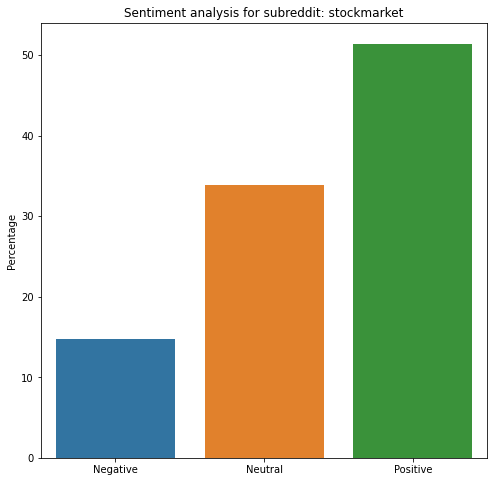

Sentiment analysis for subreddit: investing
 1    86
-1     5
 0     3
Name: label, dtype: int64
 1    91.489362
-1     5.319149
 0     3.191489
Name: label, dtype: float64


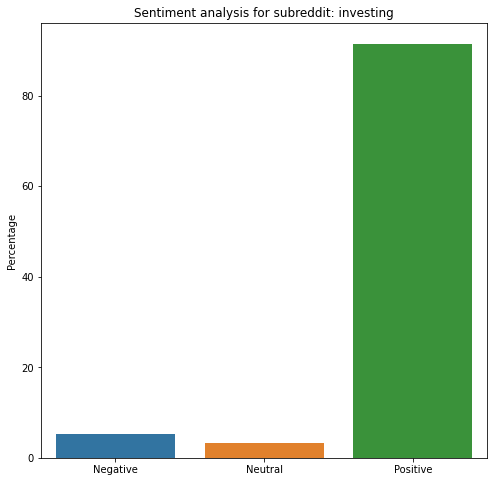

Sentiment analysis for subreddit: wallstreetbets
 1    163
-1     21
 0      2
Name: label, dtype: int64
 1    87.634409
-1    11.290323
 0     1.075269
Name: label, dtype: float64


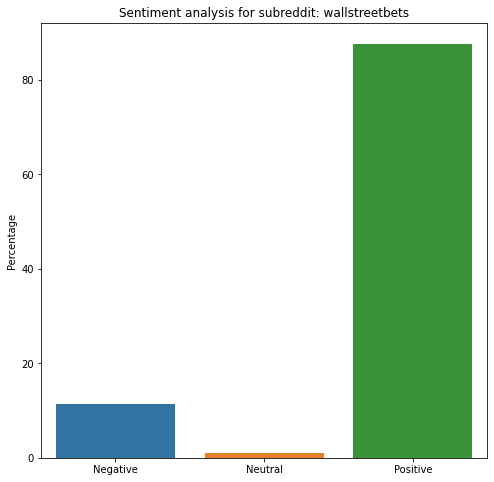

Sentiment analysis for subreddit: Wallstreetbetsnew
 1    44
 0    33
-1    15
Name: label, dtype: int64
 1    47.826087
 0    35.869565
-1    16.304348
Name: label, dtype: float64


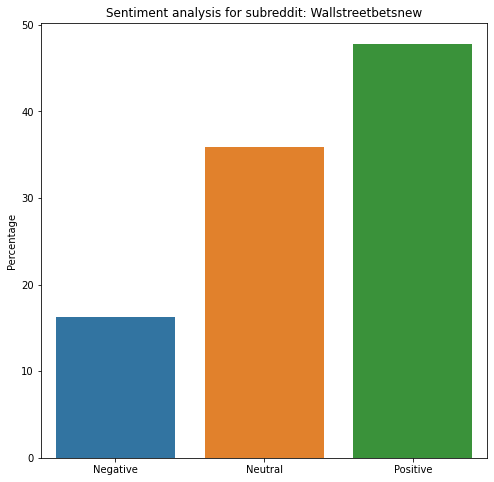

Sentiment analysis for subreddit: WallStreetbetsELITE
 0    124
 1     15
-1     10
Name: label, dtype: int64
 0    83.221477
 1    10.067114
-1     6.711409
Name: label, dtype: float64


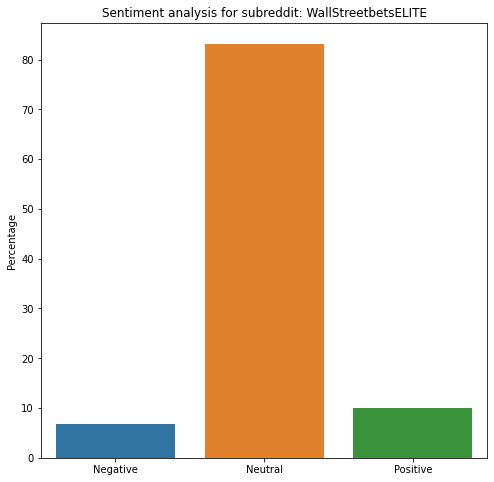

Sentiment analysis for subreddit: stocks
 1    126
-1     15
 0      1
Name: label, dtype: int64
 1    88.732394
-1    10.563380
 0     0.704225
Name: label, dtype: float64


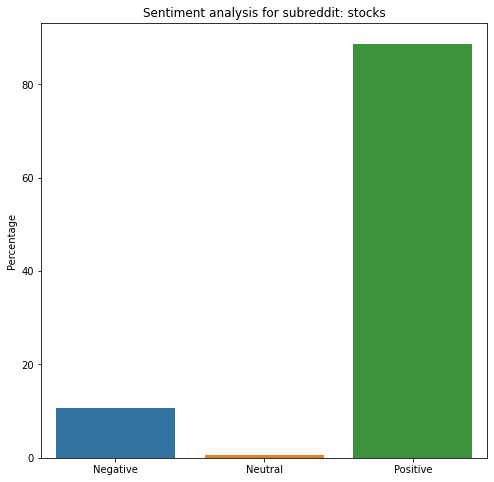

Sentiment analysis for subreddit: SPACs
 1    16
-1     5
 0     3
Name: label, dtype: int64
 1    66.666667
-1    20.833333
 0    12.500000
Name: label, dtype: float64


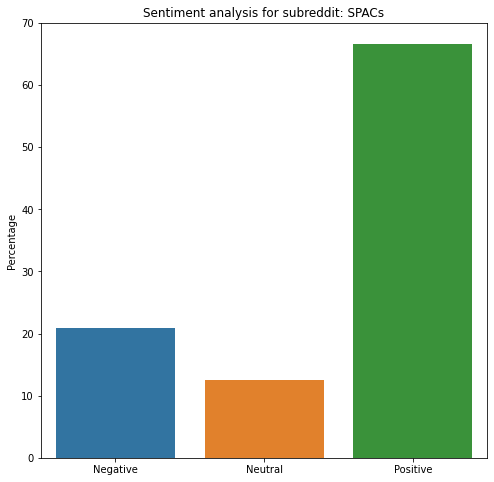

Sentiment analysis for subreddit: options
 1    58
-1     5
 0     2
Name: label, dtype: int64
 1    89.230769
-1     7.692308
 0     3.076923
Name: label, dtype: float64


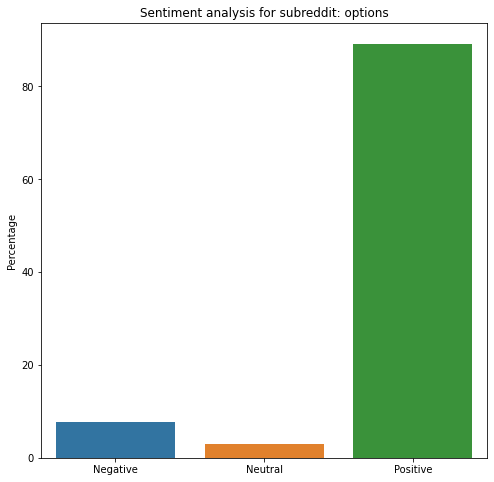

Sentiment analysis for subreddit: Daytrading
 1    42
-1     8
 0     5
Name: label, dtype: int64
 1    76.363636
-1    14.545455
 0     9.090909
Name: label, dtype: float64


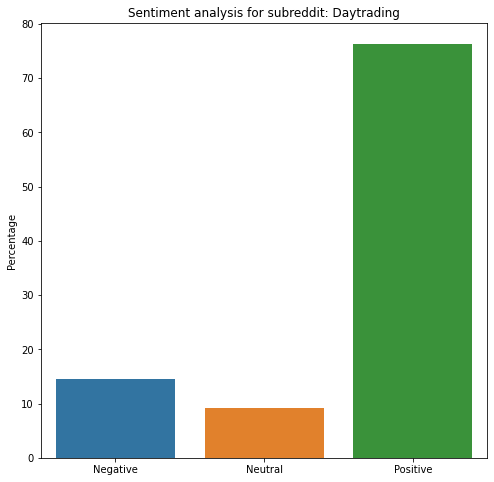

Sentiment analysis for subreddit: Shortsqueeze
 1    64
 0    24
-1    14
Name: label, dtype: int64
 1    62.745098
 0    23.529412
-1    13.725490
Name: label, dtype: float64


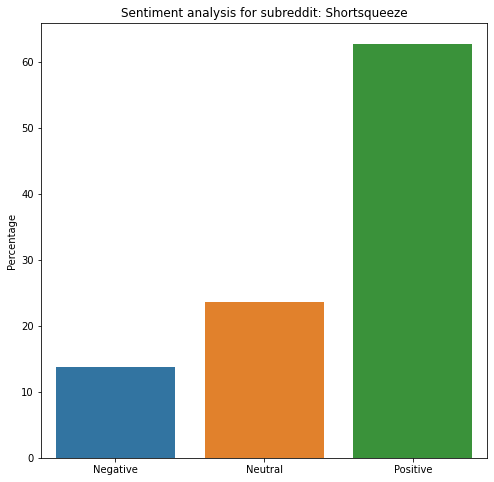

Sentiment analysis for subreddit: SqueezePlays
 1    40
 0    12
-1     3
Name: label, dtype: int64
 1    72.727273
 0    21.818182
-1     5.454545
Name: label, dtype: float64


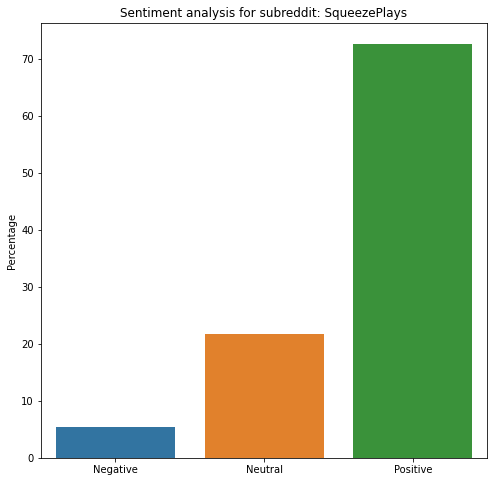

In [ ]:
# Define the list of unique values in the subreddit_name column
subreddit_names = data['subreddit_name'].unique()

# Loop over each unique value in the subreddit_name column
for subreddit in subreddit_names:
    # Filter the dataframe for the current subreddit
    subreddit_df = data[data['subreddit_name'] == subreddit]
    
    # Perform sentiment analysis on the "tokens" column
    sia = SentimentIntensityAnalyzer()
    subreddit_df[['neg', 'neu', 'pos', 'compound']] = subreddit_df['tokens'].apply(lambda x: pd.Series(sia.polarity_scores(' '.join(x))))
    
    # Create label for positive/negative/neutral
    subreddit_df['label'] = 0
    subreddit_df.loc[subreddit_df['compound'] > 0.05, 'label'] = 1
    subreddit_df.loc[subreddit_df['compound'] < -0.05, 'label'] = -1
    
    # Number/Percentage of Positive/Negative/Neutral
    print(f"Sentiment analysis for subreddit: {subreddit}")
    print(subreddit_df['label'].value_counts())
    print(subreddit_df['label'].value_counts(normalize=True) * 100)
    
    # Plot Ratings
    fig, ax = plt.subplots(figsize=(8, 8))
    
    counts = subreddit_df['label'].value_counts(normalize=True) * 100
    
    sb.barplot(x=counts.index, y=counts, ax=ax)
    
    ax.set_xticklabels(['Negative', 'Neutral', 'Positive'])
    ax.set_ylabel('Percentage')
    ax.set_title(f"Sentiment analysis for subreddit: {subreddit}")
    
    plt.show()


## Based on Stock

#### Clean Stock Names

In [ ]:
# Clean Stock Names
data['stock_name'].replace(['TSLA', 'Tesla', 'Tesla Inc.', 'Tesla Corporation'], 'TSLA', inplace=True)
data['stock_name'].replace(['PLTR', 'Palantir', 'Palantir Technologies Inc.', 'Palantir Corporation'], 'PLTR', inplace=True)
data['stock_name'].replace(['F', 'Ford', 'Ford Motor', 'Ford Motor Company'], 'F', inplace=True)
data['stock_name'].replace(['NVDA', 'Nvidia', 'Nvidia Corporation'], 'NVDA', inplace=True)
data['stock_name'].replace(['AAPL', 'Apple', 'Apple Inc.'], 'AAPL', inplace=True)
data['stock_name'].replace(['AMZN', 'Amazon', 'Amazon.com Inc.'], 'AMZN', inplace=True)
data['stock_name'].replace(['AMD', 'Advanced Micro Devices'], 'AMD', inplace=True)
data['stock_name'].replace(['GOOGL', 'Google', 'GOOG', 'Alphabet Inc.'], 'GOOGL', inplace=True)
data['stock_name'].replace(['NU', 'Northeast Utilities'], 'Nu', inplace=True)
data['stock_name'].replace(['ITUB', 'Itau Unibanco Holding SA'], 'ITUB', inplace=True)
data['stock_name'].replace(['Uber', 'Uber Technologies Inc.', 'Uber Corporation'], 'Uber', inplace=True)
data['stock_name'].replace(['MSFT', 'Microsoft', 'Microsoft Corporation'], 'MSFT', inplace=True)
data['stock_name'].replace(['NIO', 'Nio', 'Nio Inc.', 'Nio Corporation'], 'NIO', inplace=True)
data['stock_name'].replace(['AMC', 'AMC Entertainment', 'AMC Entertainment Holdings Inc.'], 'AMC', inplace=True)
data['stock_name'].replace(['CCL', 'Carnival', 'Carnival Corporation'], 'CCL', inplace=True)
data['stock_name'].replace(['LUMN', 'Lumen', 'Lumen Technologies Inc.'], 'LUMN', inplace=True)
data['stock_name'].replace(['LYFT', 'Lyft', 'Lyft Inc.', 'Lyft Corporation'], 'LYFT', inplace=True)
data['stock_name'].replace(['SNAP', 'Snap', 'Snap Inc.'], 'SNAP', inplace=True)
data['stock_name'].replace(['BAC', 'Bank of America', 'Bank of America Corporation'], 'BAC', inplace=True)
data['stock_name'].replace(['SOFI', 'SoFi', 'SoFi Technologies Inc.'], 'SOFI', inplace=True)
data['stock_name'].replace(['ABEV', 'AmBev', 'AmBev SA'], 'ABEV', inplace=True)
data['stock_name'].replace(['BBD', 'Bombardier', 'Bombardier Inc.'], 'BBD', inplace=True)
data['stock_name'].replace(['INTC', 'Intel', 'Intel Corporation'], 'INTC', inplace=True)

stocks_dict = {'Tesla': 'TSLA', 'Tesla Inc.': 'TSLA', 'Tesla Corporation': 'TSLA',
               'Palantir': 'PLTR', 'Palantir Technologies Inc.': 'PLTR', 'Palantir Corporation': 'PLTR',
               'Ford': 'F', 'Ford Motor': 'F', 'Ford Motor Company': 'F',
               'Nvidia': 'NVDA', 'Nvidia Corporation': 'NVDA',
               'Apple': 'AAPL', 'Apple Inc.': 'AAPL',
               'Amazon': 'AMZN', 'Amazon.com Inc.': 'AMZN',
               'Advanced Micro Devices': 'AMD',
               'Google': 'GOOGL', 'Alphabet Inc.': 'GOOGL',
               'Northeast Utilities': 'NU',
               'Itau Unibanco Holding SA': 'ITUB',
               'Uber': 'UBER', 'Uber Technologies Inc.': 'UBER', 'Uber Corporation': 'UBER',
               'Microsoft': 'MSFT', 'Microsoft Corporation': 'MSFT',
               'Nio': 'NIO', 'Nio Inc.': 'NIO', 'Nio Corporation': 'NIO',
               'AMC Entertainment': 'AMC', 'AMC Entertainment Holdings Inc.': 'AMC',
               'Carnival': 'CCL', 'Carnival Corporation': 'CCL',
               'Lumen': 'LUMN', 'Lumen Technologies Inc.': 'LUMN',
               'Lyft': 'LYFT', 'Lyft Inc.': 'LYFT', 'Lyft Corporation': 'LYFT',
               'Snap': 'SNAP', 'Snap Inc.': 'SNAP',
               'Bank of America': 'BAC', 'Bank of America Corporation': 'BAC',
               'SoFi': 'SOFI', 'SoFi Technologies Inc.': 'SOFI',
               'AmBev': 'ABEV', 'AmBev SA': 'ABEV',}
data['stock_name'] = data['stock_name'].apply(lambda x: stocks_dict[x] if x in stocks_dict else x)

ticker_dict = {'Bombardier': 'BBD', 'Bombardier Inc.': 'BBD', 'Intel': 'INTC',
               'Intel Corporation': 'INTC', 'Arlington': 'AI',
               'Arlington Asset Investment Corp.': 'AI', 'Credit Suisse': 'CS',
               'Credit Suisse Group AG': 'CS', 'Apeel': 'APE',
               'Apeel Sciences Inc.': 'APE', 'Metamaterial': 'META',
               'Metamaterial Inc.': 'META', 'Coinbase': 'COIN',
               'Coinbase Global Inc.': 'COIN', 'AT&T': 'T', 'AT&T Inc.': 'T',
               'Affirm': 'AFRM', 'Affirm Holdings Inc.': 'AFRM',
               'Southwestern': 'SWN', 'Southwestern Energy Company': 'SWN',
               'Cleveland': 'CLF', 'Cleveland-Cliffs Inc.': 'CLF',
               'Sphereon': 'DNA', 'Sphere 3D Corp.': 'DNA', 'Barrick': 'GOLD',
               'Barrick Gold Corporation': 'GOLD', 'Grab': 'GRAB',
               'Grab Holdings Inc.': 'GRAB', 'Cisco': 'CSCO',
               'Cisco Systems Inc.': 'CSCO', 'PayPal': 'PYPL',
               'PayPal Holdings Inc.': 'PYPL', 'Shopify': 'SHOP',
               'Shopify Inc.': 'SHOP', 'Comcast': 'CMCSA',
               'Comcast Corporation': 'CMCSA', 'Lucid': 'LCID',
               'Lucid Group Inc.': 'LCID', 'B2Gold': 'BTG', 'B2Gold Corp.': 'BTG',
               'Coca-Cola': 'KO', 'The Coca-Cola Company': 'KO',
               'Pfizer': 'PFE', 'Pfizer Inc.': 'PFE', 'American Airlines': 'AAL',
               'American Airlines Group Inc.': 'AAL', 'Peabody': 'BTU',
               'Peabody Energy Corporation': 'BTU'}
data['stock_name'] = data['stock_name'].apply(lambda x: ticker_dict[x] if x in ticker_dict else x)

mapping = {
    'RIVN': 'Rivian Automotive Inc.',
    'Rivian': 'Rivian Automotive Inc.',
    'WFC': 'Wells Fargo & Company',
    'Wells Fargo': 'Wells Fargo & Company',
    'C': 'Citigroup Inc.',
    'Citigroup': 'Citigroup Inc.',
    'PBR': 'Petroleo Brasileiro SA',
    'Petrobras': 'Petroleo Brasileiro SA'
}

data['stock_name'] = data['stock_name'].replace(mapping)

stock_dict = {
    'TSLA': ['Tesla', 'Tesla Inc.', 'Tesla Corporation', 'tesla', 'TESLA', 'Tsla'],
    'PLTR': ['Palantir', 'Palantir Technologies Inc.', 'Palantir Corporation'],
    'F': ['Ford', 'Ford Motor', 'Ford Motor Company', 'f'],
    'NVDA': ['Nvidia', 'Nvidia Corporation', 'NVIDIA', 'Nvda'],
    'AAPL': ['Apple', 'Apple Inc.', 'APPLE'],
    'AMZN': ['Amazon', 'Amazon.com Inc.', 'amazon'],
    'AMD': ['Advanced Micro Devices', 'Amd'],
    'GOOGL': ['Google', 'Alphabet Inc.', 'google', 'googl'],
    'NU': ['Northeast Utilities', 'Nu'],
    'ITUB': ['Itau Unibanco Holding SA'],
    'GOOG': ['Uber', 'Uber Technologies Inc.', 'Uber Corporation', 'RIVIAN', 'Rivian Automotive Inc.'],
    'MSFT': ['Microsoft', 'Microsoft Corporation', 'msft'],
    'NIO': ['Nio', 'Nio Inc.', 'Nio Corporation'],
    'AMC': ['AMC Entertainment', 'AMC Entertainment Holdings Inc.', 'amc'],
    'CCL': ['Carnival', 'Carnival Corporation'],
    'LUMN': ['Lumen', 'Lumen Technologies Inc.'],
    'LYFT': ['Lyft', 'Lyft Inc.', 'Lyft Corporation', 'lyft'],
    'SNAP': ['Snap', 'Snap Inc.', 'snap'],
    'BAC': ['Bank of America', 'Bank of America Corporation'],
    'SOFI': ['SoFi', 'SoFi Technologies Inc.', 'sofi'],
    'ABEV': ['AmBev', 'AmBev SA', 'GOLD', 'Barrick', 'Barrick Gold Corporation', 'gold'],
    'BBD': ['Bombardier', 'Bombardier Inc.'],
    'INTC': ['Intel', 'Intel Corporation', 'intel'],
    'AI': ['Arlington', 'Arlington Asset Investment Corp.', 'ai'],
    'CS': ['Credit Suisse', 'Credit Suisse Group AG'],
    'APE': ['Apeel', 'Apeel Sciences Inc.', 'Ape', 'ape'],
    'META': ['Metamaterial', 'Metamaterial Inc.', 'Meta', 'meta'],
    'COIN': ['Coinbase', 'Coinbase Global Inc.', 'coin', 'coinbase'],
    'T': ['AT&T', 'AT&T Inc.'],
    'AFRM': ['Affirm', 'Affirm Holdings Inc.'],
    'SWN': ['Southwestern', 'Southwestern Energy Company'],
    'CLF': ['Cleveland', 'Cleveland-Cliffs Inc.'],
    'DNA': ['Sphereon', 'Sphere 3D Corp.'],
    'GRAB': ['Grab', 'Grab Holdings Inc.'],
    'CSCO': ['Cisco', 'Cisco Systems Inc.'],
    'PYPL': ['PayPal', 'PayPal Holdings Inc.', 'PYPL'],
    'SHOP': ['Shopify', 'Shopify Inc.', 'SHOPIFY'],
    'CMCSA': ['Comcast', 'Comcast Corporation'],
    'LCID': ['Lucid', 'Lucid Group Inc.'],}
data['stock_name'] = data['stock_name'].apply(lambda x: stocks_dict[x] if x in stocks_dict else x)

stock_dict = {'SHOP': 'SHOP',
              'TSLA': 'TSLA',
              'AI': 'AI',
              'META': 'META',
              'COIN': 'COIN',
              'PLTR': 'PLTR',
              't': 'T',
              'AMZN': 'AMZN',
              'MSFT': 'MSFT',
              'CS': 'CS',
              'AAPL': 'AAPL',
              'Gold': 'GOLD',
              'tesla': 'TSLA',
              'Citigroup Inc.': 'C',
              'LUMN': 'LUMN',
              'Meta': 'META',
              'PYPL': 'PYPL',
              'GOOGL': 'GOOGL',
              'LYFT': 'LYFT',
              'UBER': 'UBER',
              'F': 'F',
              'SNAP': 'SNAP',
              'NVDA': 'NVDA',
              'Rivian Automotive Inc.': 'RIVN',
              'T': 'T',
              'AMD': 'AMD',
              'Wells Fargo & Company': 'WFC',
              'AMC': 'AMC',
              'CSCO': 'CSCO',
              'google': 'GOOGL',
              'gold': 'GOLD',
              'ai': 'AI',
              'INTC': 'INTC',
              'coin': 'COIN',
              'Sofi': 'SOFI',
              'AFRM': 'AFRM',
              'NVIDIA': 'NVDA',
              'LCID': 'LCID',
              'msft': 'MSFT',
              'CCL': 'CCL',
              'TESLA': 'TSLA',
              'SHOPIFY': 'SHOP',
              'KO': 'KO',
              'BTU': 'BTU',
              'meta': 'META',
              'Tsla': 'TSLA',
              'BAC': 'BAC',
              'googl': 'GOOGL',
              'tsla': 'TSLA',
              'apple': 'AAPL',
              'GOLD': 'GOLD',
              'Ape': 'APE',
              'APE': 'APE',
              'amazon': 'AMZN',
              'Nu': 'NU',
              'SOFI': 'SOFI',
              'CMCSA': 'CMCSA',
              'NIO': 'NIO',
              'APPLE': 'AAPL',
              'PFE': 'PFE',
              'CLF': 'CLF',
              'snap': 'SNAP',
              'RIVIAN': 'RIVN',
              'INTEL': 'INTC',
              'intel': 'INTC',
              'LUCID': 'LCID',
              'amc': 'AMC',
              'sofi': 'SOFI',
              'f': 'F',
              'Nvda': 'NVDA',
              'coinbase': 'COIN',
              'Ai': 'AI',
              'GRAB': 'GRAB',
              'ape': 'APE',
              'amd': 'AMD'}

data['stock_name'].replace(stock_dict, inplace=True)


In [ ]:
data['stock_name'].unique()

array(['SHOP', 'TSLA', 'AI', 'META', 'COIN', 'PLTR', 'T', 'AMZN', 'MSFT',
       'CS', 'AAPL', 'GOLD', 'C', 'LUMN', 'PYPL', 'GOOGL', 'LYFT', 'UBER',
       'F', 'SNAP', 'NVDA', 'RIVN', 'AMD', 'WFC', 'AMC', 'CSCO', 'INTC',
       'SOFI', 'AFRM', 'LCID', 'CCL', 'KO', 'BTU', 'BAC', 'APE', 'NU',
       'CMCSA', 'NIO', 'PFE', 'CLF', 'GRAB'], dtype=object)

In [ ]:
data['stock_name'].value_counts()

T        263
TSLA     158
AI        87
GOOGL     60
AAPL      52
AMC       50
META      47
AMZN      44
MSFT      42
F         28
GOLD      27
NVDA      24
SHOP      22
LYFT      18
PLTR      16
LCID      15
COIN      13
INTC      11
APE       11
CS        10
SNAP       9
RIVN       9
CSCO       9
AFRM       9
SOFI       9
CMCSA      7
UBER       7
PYPL       7
AMD        6
BAC        6
C          5
PFE        5
KO         4
WFC        3
CLF        3
LUMN       2
NU         2
BTU        2
CCL        2
NIO        1
GRAB       1
Name: stock_name, dtype: int64

The aforementioned code exhibits the frequency of posts associated with each stock when the API extracted the most popular and current posts across all subreddits employed in this project. This information could prove meaningful for identifying which stock underwent the most prominent trends during the recent period and which stocks carried relatively lesser significance.

### Combined

Parallel to the subreddit section, wherein tokens were consolidated for each subreddit, in this instance, all tokens corresponding to each stock were merged, followed by a comprehensive sentiment analysis for deriving the overall score.

In [ ]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import pandas as pd

# Get all unique values in the 'stock_name' column
unique_stocks = data['stock_name'].unique()

# Create a dictionary to store the sentiment scores for each stock
sentiment_scores = {}

# Iterate over each unique stock
for stock in unique_stocks:
    # Select only rows with the current stock
    stock_df = data[data['stock_name'] == stock]
    
    # Combine all elements in the "tokens" column into a single line
    combined_tokens = " ".join(stock_df['tokens'].explode())
    
    # Perform sentiment analysis on the combined tokens dataframe
    sia = SentimentIntensityAnalyzer()
    sentiment = sia.polarity_scores(combined_tokens)
    
    # Store the sentiment scores in the dictionary
    sentiment_scores[stock] = sentiment

# Convert the sentiment scores dictionary to a DataFrame
sentiment_df = pd.DataFrame.from_dict(sentiment_scores, orient='index', columns=['neg', 'neu', 'pos', 'compound'])

# Print the sentiment scores DataFrame
print(sentiment_df)


         neg    neu    pos  compound
SHOP   0.103  0.673  0.225    0.9998
TSLA   0.109  0.709  0.183    1.0000
AI     0.096  0.727  0.177    1.0000
META   0.102  0.704  0.195    1.0000
COIN   0.137  0.739  0.124   -0.9946
PLTR   0.104  0.695  0.200    1.0000
T      0.117  0.703  0.181    1.0000
AMZN   0.098  0.702  0.201    1.0000
MSFT   0.106  0.713  0.182    1.0000
CS     0.101  0.664  0.235    0.9996
AAPL   0.089  0.730  0.181    1.0000
GOLD   0.101  0.718  0.182    1.0000
C      0.161  0.595  0.243    0.9936
LUMN   0.090  0.731  0.179    0.9893
PYPL   0.151  0.680  0.169    0.9950
GOOGL  0.106  0.713  0.181    1.0000
LYFT   0.105  0.716  0.180    0.9999
UBER   0.124  0.692  0.184    0.9995
F      0.101  0.707  0.191    1.0000
SNAP   0.102  0.717  0.181    0.9997
NVDA   0.091  0.718  0.192    1.0000
RIVN   0.094  0.715  0.190    0.9999
AMD    0.082  0.738  0.180    0.9999
WFC    0.154  0.610  0.236    0.9969
AMC    0.115  0.696  0.189    1.0000
CSCO   0.127  0.711  0.162    0.9703
I

Most of the companies have a relatively balanced sentiment distribution between negative, neutral, and positive sentiment, with the neutral sentiment score being the highest for many companies. This suggests that there is not a strong bias towards positive or negative sentiment in the overall sentiment analysis.

The compound score is very high (close to 1) for most of the companies, which indicates that the sentiment analysis algorithm has assigned a strongly positive sentiment to most of the companies. This could be due to the fact that the data set consists of recent tweets and news articles, which tend to be more positive in nature, as people often share positive news more frequently than negative news.

There are a few exceptions to the overall positive sentiment trend. For example, COIN has a compound score of -0.9946, indicating very negative sentiment, while CLF has a compound score of -0.5456, indicating moderately negative sentiment. These companies may be experiencing negative news or other factors that are influencing sentiment towards them.
Some companies have a higher proportion of positive sentiment compared to others. For example, BTU has a relatively high proportion of positive sentiment, with a score of 0.287, while PFE has a lower proportion of positive sentiment, with a score of 0.168. This may reflect differences in the overall perception of these companies by the public.
Some companies have a very high neutral sentiment score, indicating that sentiment towards these companies is not strongly positive or negative. For example, NU has a neutral sentiment score of 0.556, while CMCSA has a neutral sentiment score of 0.861. This may suggest that these companies are not currently experiencing strong public sentiment or attention.

### Individual 

Analogous to the subreddit segment, each stock underwent individual post analysis, culminating in an enumeration of the positive, negative, and neutral responses elicited by each stock.

Sentiment analysis for stock: SHOP
 1    17
 0     4
-1     1
Name: label, dtype: int64
 1    77.272727
 0    18.181818
-1     4.545455
Name: label, dtype: float64


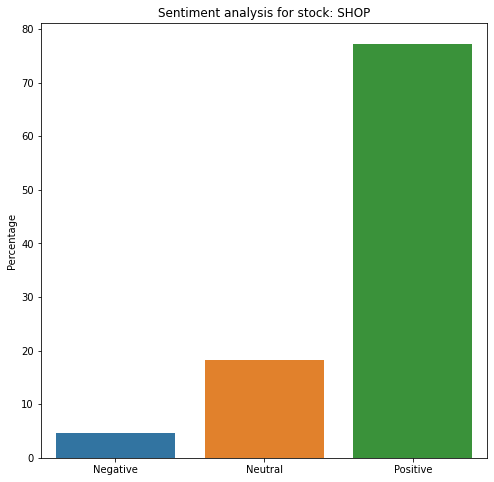

Sentiment analysis for stock: TSLA
 1    110
 0     27
-1     21
Name: label, dtype: int64
 1    69.620253
 0    17.088608
-1    13.291139
Name: label, dtype: float64


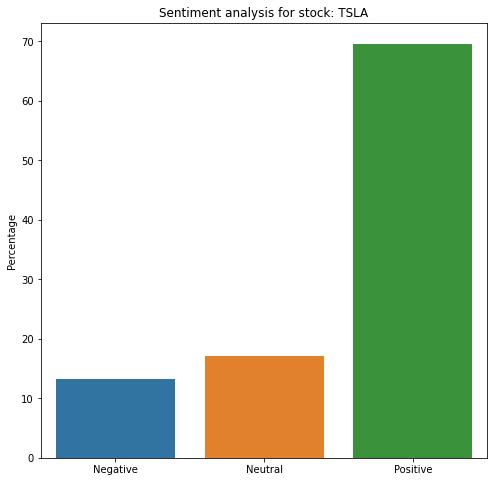

Sentiment analysis for stock: AI
 1    54
 0    26
-1     7
Name: label, dtype: int64
 1    62.068966
 0    29.885057
-1     8.045977
Name: label, dtype: float64


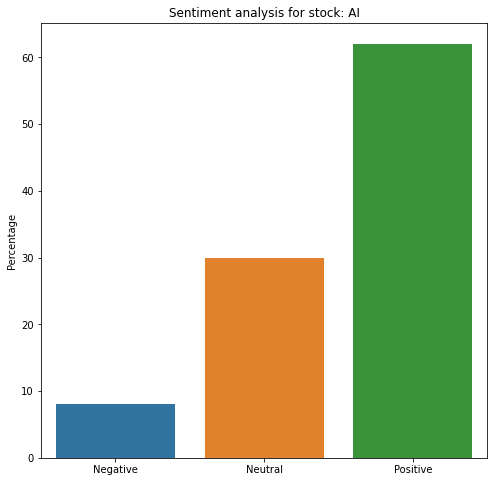

Sentiment analysis for stock: META
 1    27
 0    17
-1     3
Name: label, dtype: int64
 1    57.446809
 0    36.170213
-1     6.382979
Name: label, dtype: float64


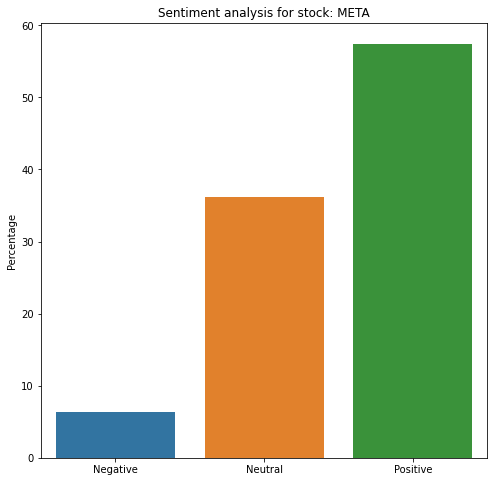

Sentiment analysis for stock: COIN
 0    5
 1    4
-1    4
Name: label, dtype: int64
 0    38.461538
 1    30.769231
-1    30.769231
Name: label, dtype: float64


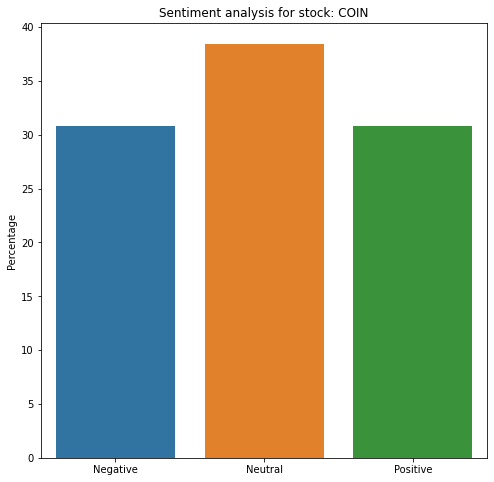

Sentiment analysis for stock: PLTR
1    13
0     3
Name: label, dtype: int64
1    81.25
0    18.75
Name: label, dtype: float64


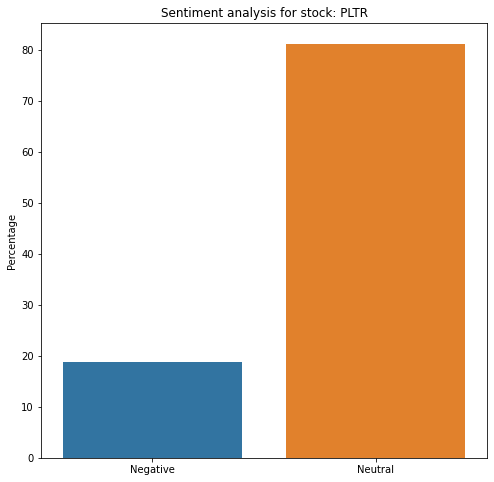

Sentiment analysis for stock: T
 1    177
 0     48
-1     38
Name: label, dtype: int64
 1    67.300380
 0    18.250951
-1    14.448669
Name: label, dtype: float64


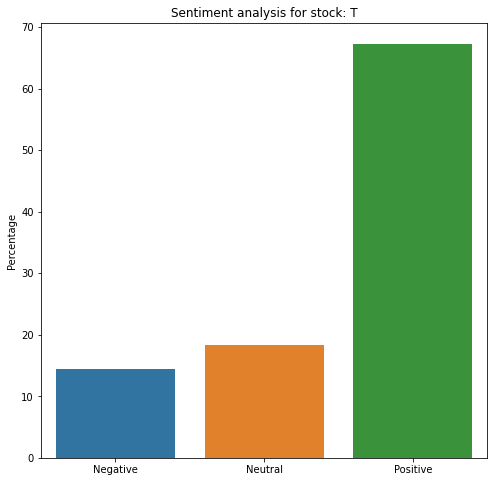

Sentiment analysis for stock: AMZN
 1    31
 0    10
-1     3
Name: label, dtype: int64
 1    70.454545
 0    22.727273
-1     6.818182
Name: label, dtype: float64


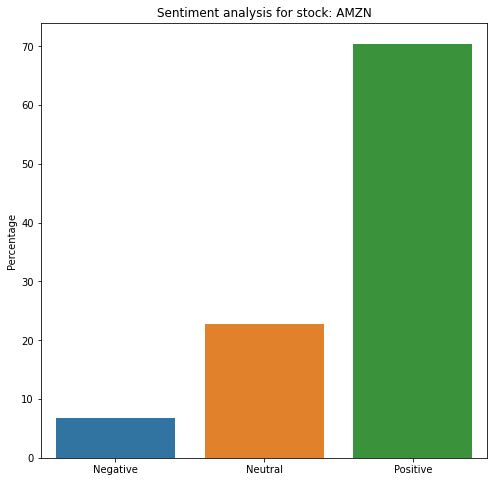

Sentiment analysis for stock: MSFT
 1    29
 0     9
-1     4
Name: label, dtype: int64
 1    69.047619
 0    21.428571
-1     9.523810
Name: label, dtype: float64


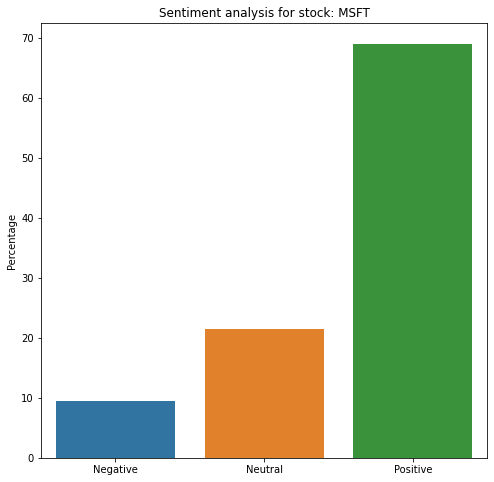

Sentiment analysis for stock: CS
1    5
0    5
Name: label, dtype: int64
1    50.0
0    50.0
Name: label, dtype: float64


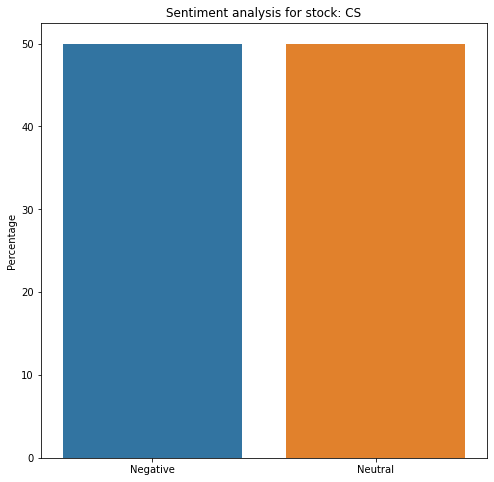

Sentiment analysis for stock: AAPL
 1    29
 0    20
-1     3
Name: label, dtype: int64
 1    55.769231
 0    38.461538
-1     5.769231
Name: label, dtype: float64


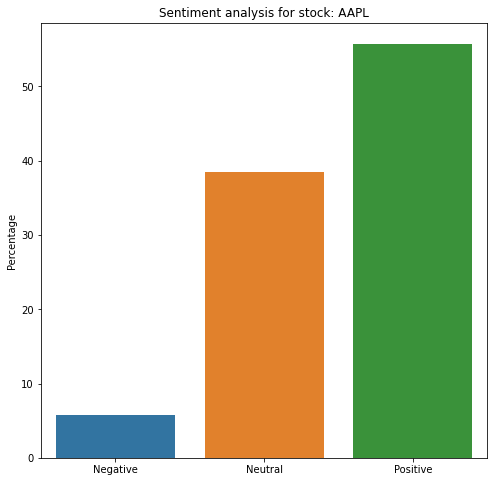

Sentiment analysis for stock: GOLD
 1    14
 0    10
-1     3
Name: label, dtype: int64
 1    51.851852
 0    37.037037
-1    11.111111
Name: label, dtype: float64


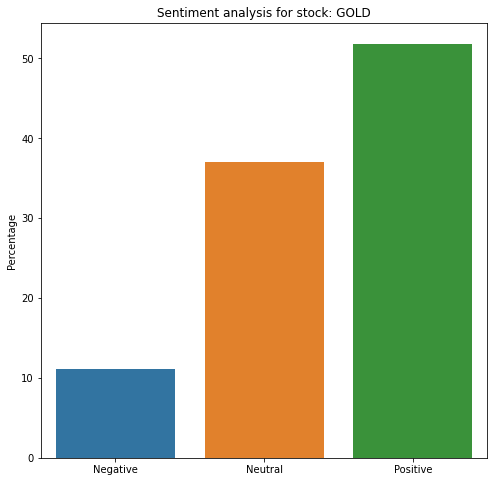

Sentiment analysis for stock: C
-1    2
 1    2
 0    1
Name: label, dtype: int64
-1    40.0
 1    40.0
 0    20.0
Name: label, dtype: float64


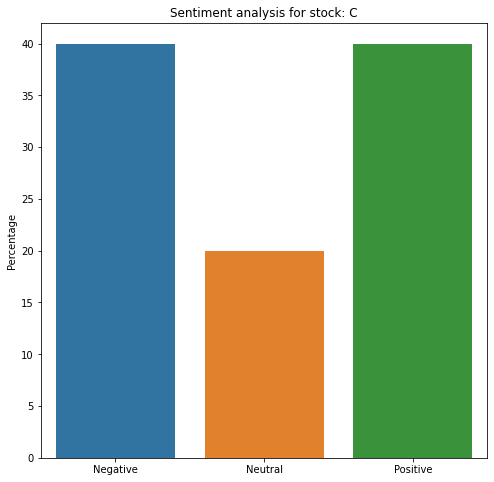

Sentiment analysis for stock: LUMN
1    2
Name: label, dtype: int64
1    100.0
Name: label, dtype: float64


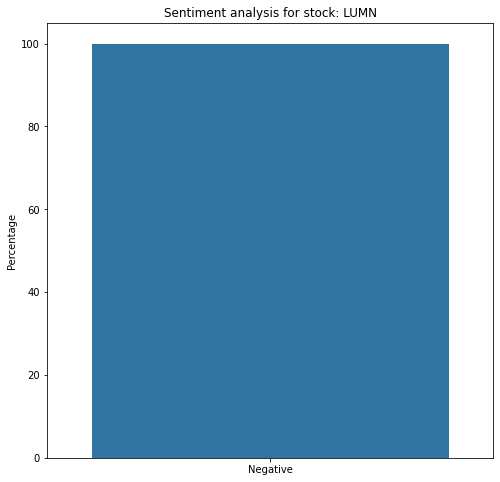

Sentiment analysis for stock: PYPL
1    6
0    1
Name: label, dtype: int64
1    85.714286
0    14.285714
Name: label, dtype: float64


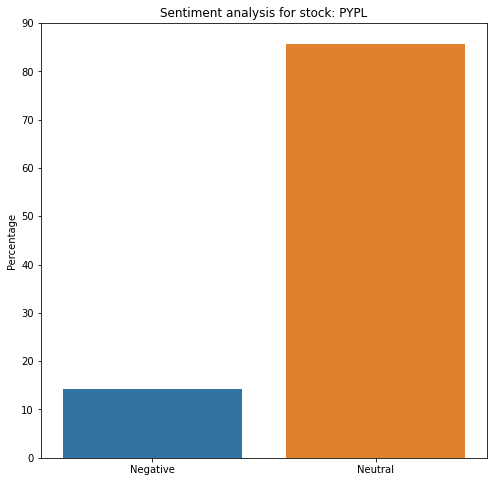

Sentiment analysis for stock: GOOGL
 1    47
 0     8
-1     5
Name: label, dtype: int64
 1    78.333333
 0    13.333333
-1     8.333333
Name: label, dtype: float64


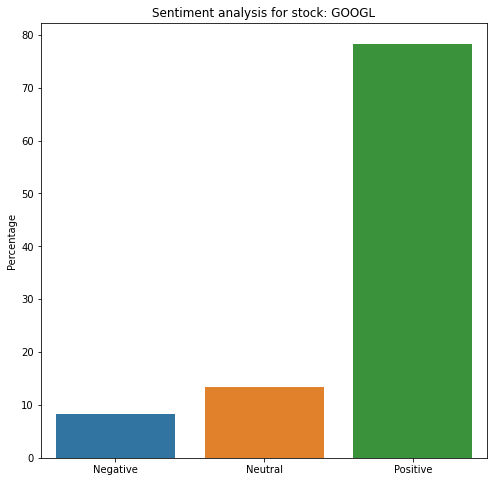

Sentiment analysis for stock: LYFT
 1    11
 0     5
-1     2
Name: label, dtype: int64
 1    61.111111
 0    27.777778
-1    11.111111
Name: label, dtype: float64


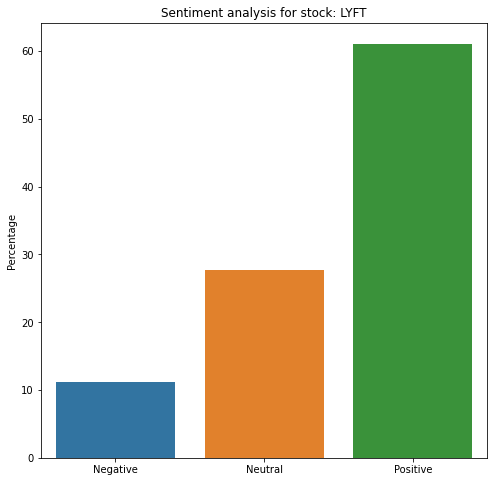

Sentiment analysis for stock: UBER
1    6
0    1
Name: label, dtype: int64
1    85.714286
0    14.285714
Name: label, dtype: float64


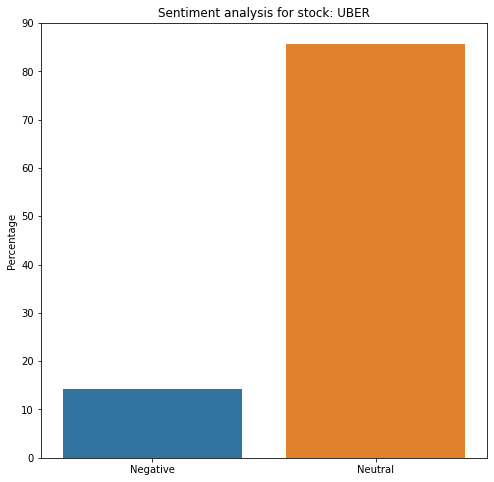

Sentiment analysis for stock: F
 1    19
 0     5
-1     4
Name: label, dtype: int64
 1    67.857143
 0    17.857143
-1    14.285714
Name: label, dtype: float64


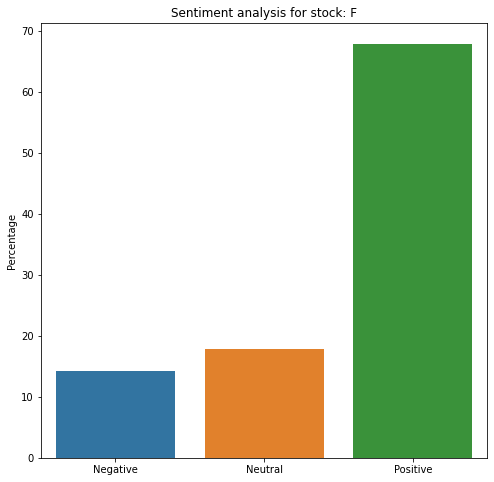

Sentiment analysis for stock: SNAP
 1    5
 0    3
-1    1
Name: label, dtype: int64
 1    55.555556
 0    33.333333
-1    11.111111
Name: label, dtype: float64


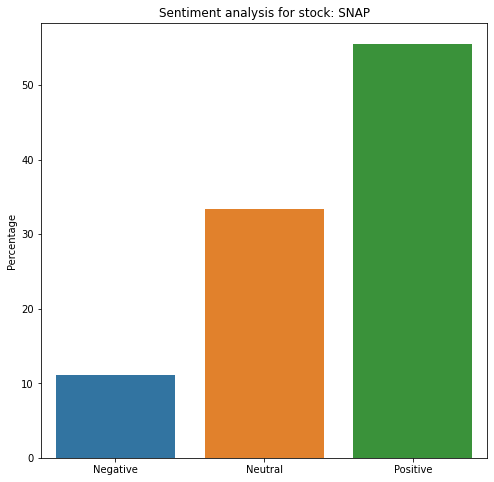

Sentiment analysis for stock: NVDA
 1    20
 0     3
-1     1
Name: label, dtype: int64
 1    83.333333
 0    12.500000
-1     4.166667
Name: label, dtype: float64


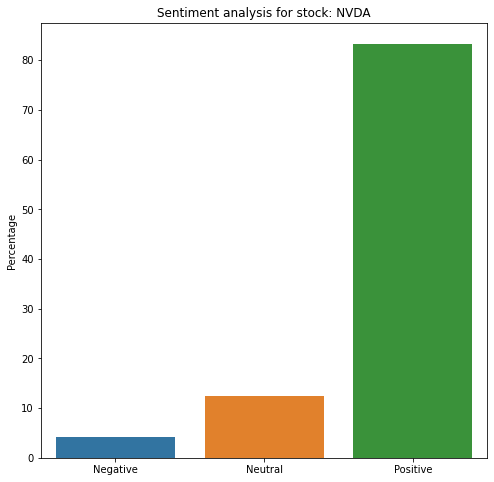

Sentiment analysis for stock: RIVN
1    7
0    2
Name: label, dtype: int64
1    77.777778
0    22.222222
Name: label, dtype: float64


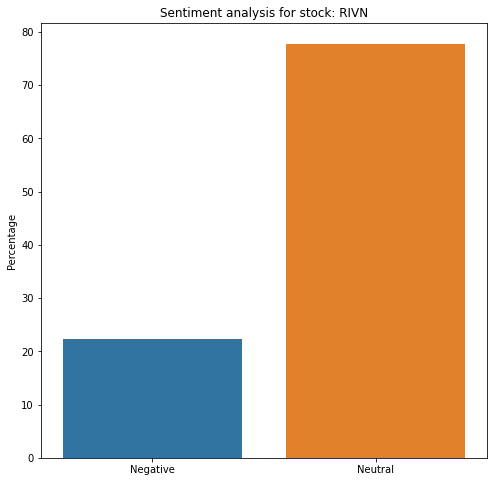

Sentiment analysis for stock: AMD
 1    4
-1    1
 0    1
Name: label, dtype: int64
 1    66.666667
-1    16.666667
 0    16.666667
Name: label, dtype: float64


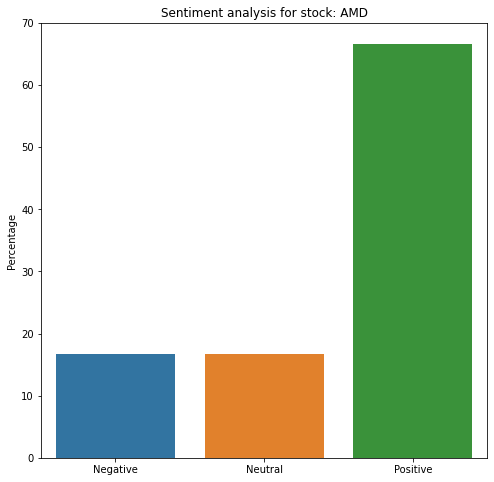

Sentiment analysis for stock: WFC
 1    1
-1    1
 0    1
Name: label, dtype: int64
 1    33.333333
-1    33.333333
 0    33.333333
Name: label, dtype: float64


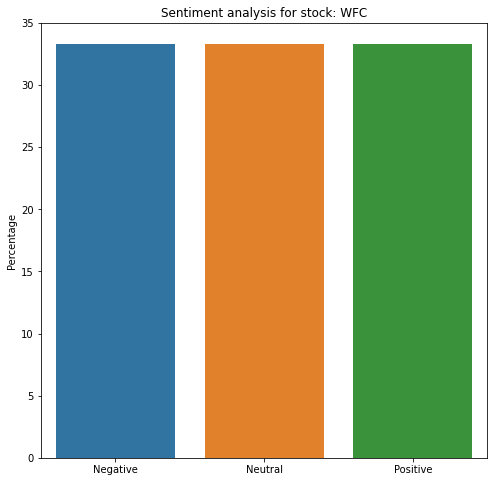

Sentiment analysis for stock: AMC
 1    32
 0    11
-1     7
Name: label, dtype: int64
 1    64.0
 0    22.0
-1    14.0
Name: label, dtype: float64


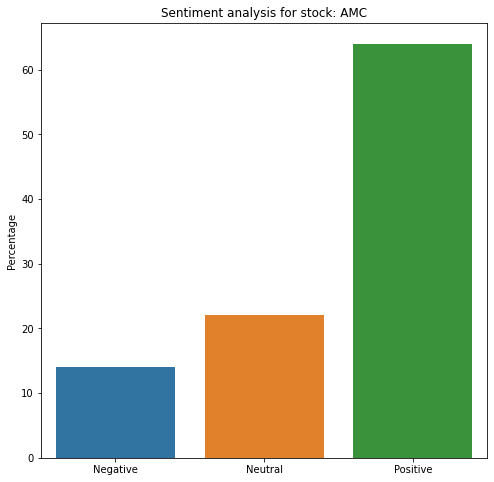

Sentiment analysis for stock: CSCO
0    5
1    4
Name: label, dtype: int64
0    55.555556
1    44.444444
Name: label, dtype: float64


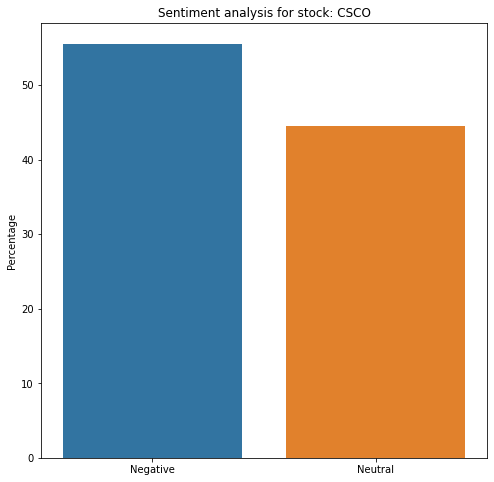

Sentiment analysis for stock: INTC
 1    7
 0    3
-1    1
Name: label, dtype: int64
 1    63.636364
 0    27.272727
-1     9.090909
Name: label, dtype: float64


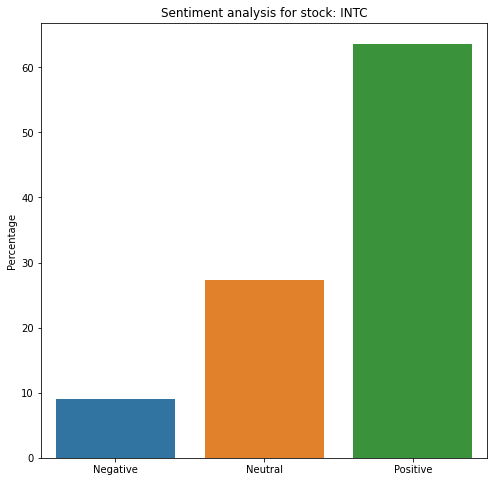

Sentiment analysis for stock: SOFI
1    8
0    1
Name: label, dtype: int64
1    88.888889
0    11.111111
Name: label, dtype: float64


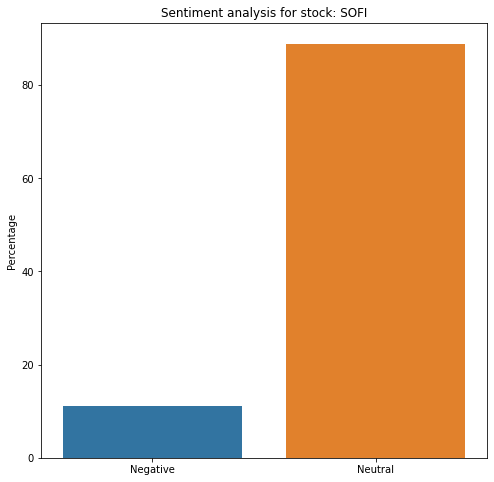

Sentiment analysis for stock: AFRM
1    6
0    3
Name: label, dtype: int64
1    66.666667
0    33.333333
Name: label, dtype: float64


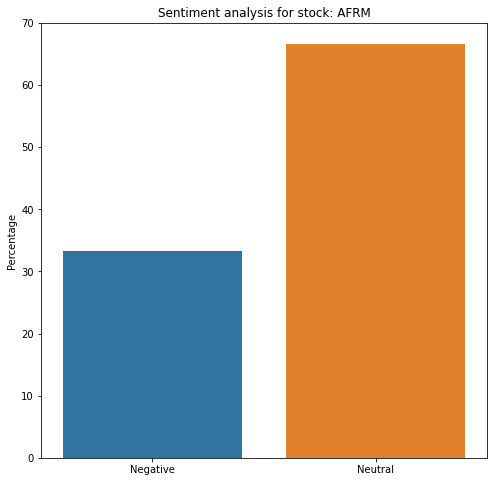

Sentiment analysis for stock: LCID
 1    9
 0    4
-1    2
Name: label, dtype: int64
 1    60.000000
 0    26.666667
-1    13.333333
Name: label, dtype: float64


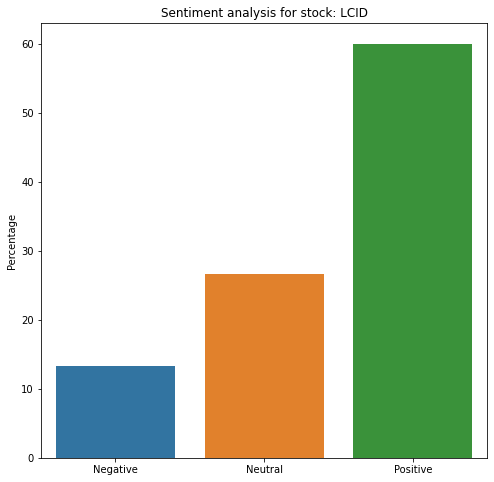

Sentiment analysis for stock: CCL
1    2
Name: label, dtype: int64
1    100.0
Name: label, dtype: float64


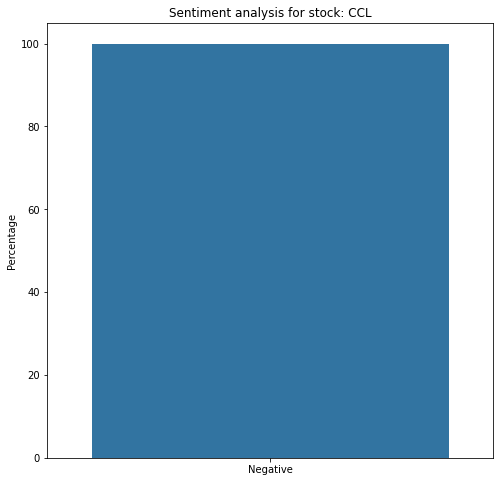

Sentiment analysis for stock: KO
1    2
0    2
Name: label, dtype: int64
1    50.0
0    50.0
Name: label, dtype: float64


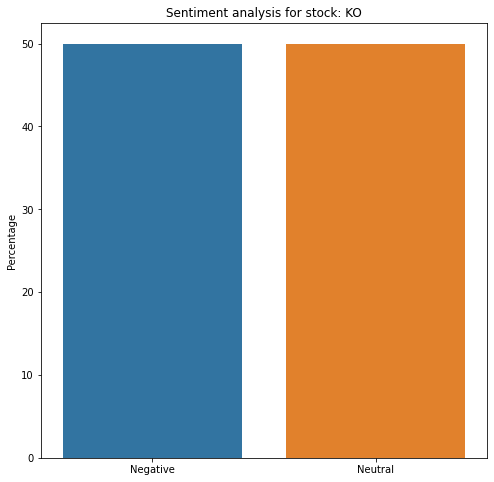

Sentiment analysis for stock: BTU
1    2
Name: label, dtype: int64
1    100.0
Name: label, dtype: float64


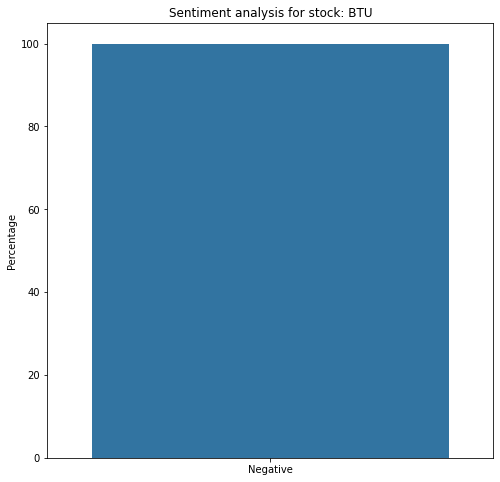

Sentiment analysis for stock: BAC
 0    3
 1    2
-1    1
Name: label, dtype: int64
 0    50.000000
 1    33.333333
-1    16.666667
Name: label, dtype: float64


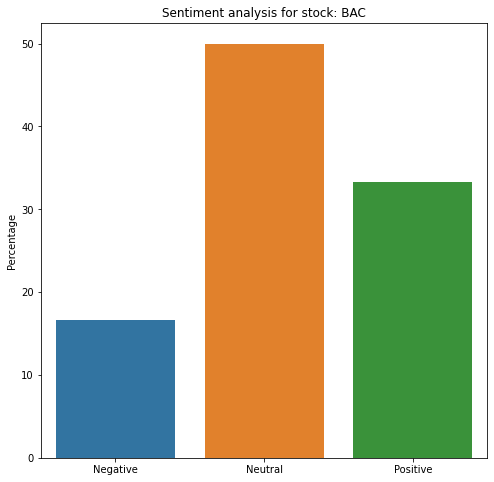

Sentiment analysis for stock: APE
 1    7
-1    4
Name: label, dtype: int64
 1    63.636364
-1    36.363636
Name: label, dtype: float64


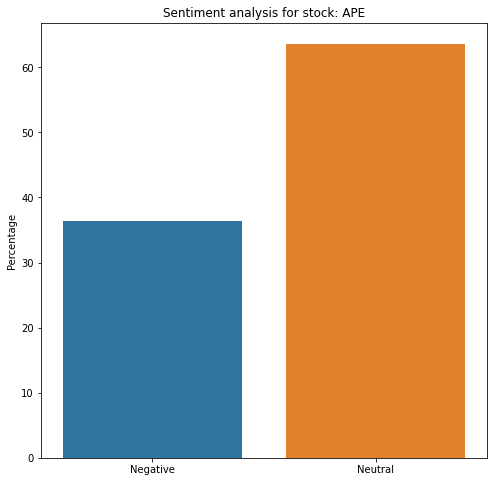

Sentiment analysis for stock: NU
0    1
1    1
Name: label, dtype: int64
0    50.0
1    50.0
Name: label, dtype: float64


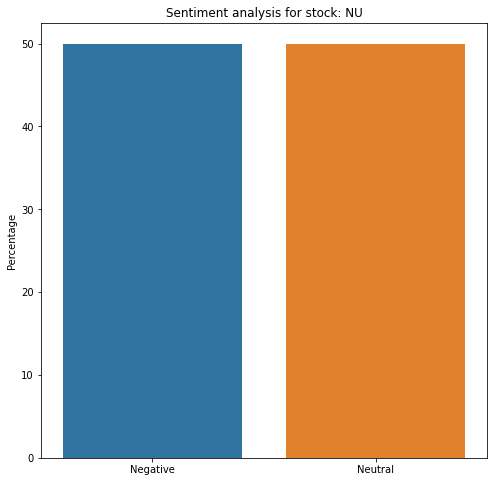

Sentiment analysis for stock: CMCSA
 0    4
-1    2
 1    1
Name: label, dtype: int64
 0    57.142857
-1    28.571429
 1    14.285714
Name: label, dtype: float64


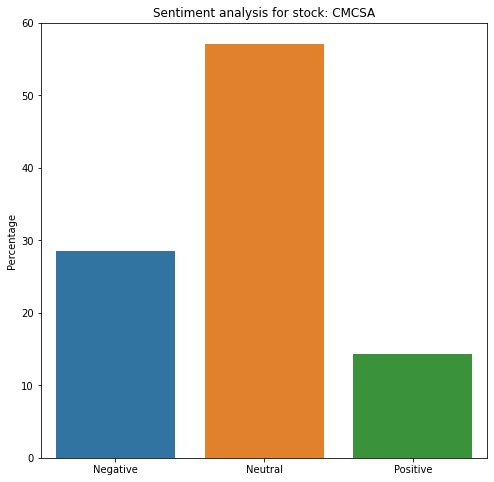

Sentiment analysis for stock: NIO
1    1
Name: label, dtype: int64
1    100.0
Name: label, dtype: float64


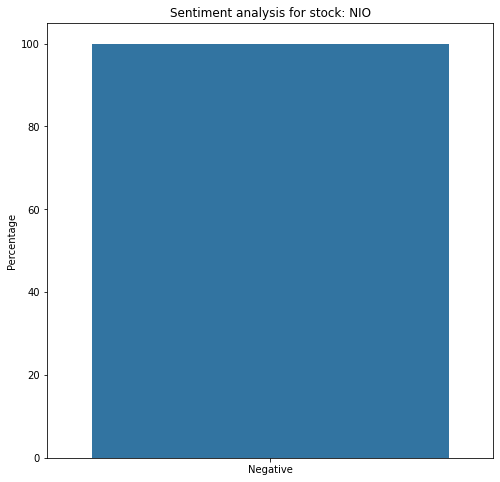

Sentiment analysis for stock: PFE
0    3
1    2
Name: label, dtype: int64
0    60.0
1    40.0
Name: label, dtype: float64


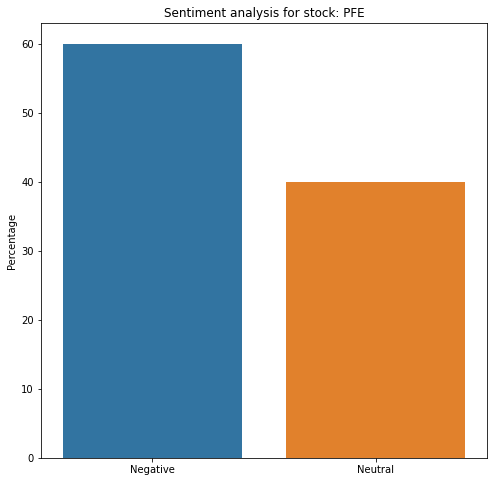

Sentiment analysis for stock: CLF
 0    2
-1    1
Name: label, dtype: int64
 0    66.666667
-1    33.333333
Name: label, dtype: float64


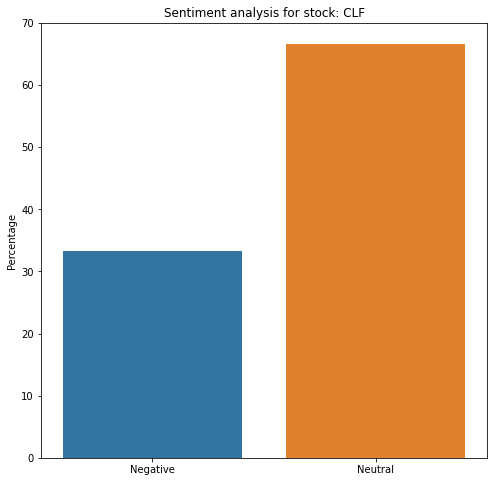

Sentiment analysis for stock: GRAB
1    1
Name: label, dtype: int64
1    100.0
Name: label, dtype: float64


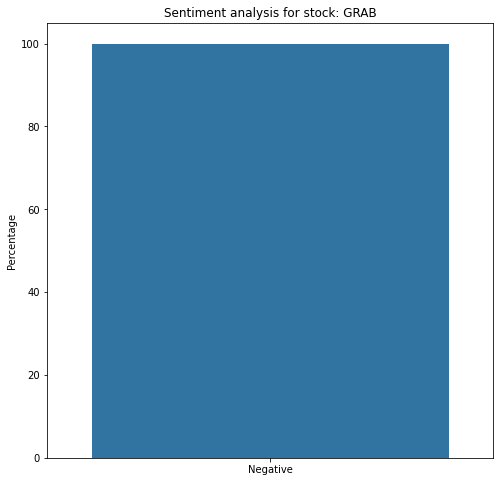

In [ ]:
# Define the list of unique values in the stock_name column
stock_names = data['stock_name'].unique()

# Loop over each unique value in the stock_name column
for stock in stock_names:
    # Filter the dataframe for the current stock
    stock_df = data[data['stock_name'] == stock]
    
    # Perform sentiment analysis on the "tokens" column
    sia = SentimentIntensityAnalyzer()
    stock_df[['neg', 'neu', 'pos', 'compound']] = stock_df['tokens'].apply(lambda x: pd.Series(sia.polarity_scores(' '.join(x))))
    
    # Create label for positive/negative/neutral
    stock_df['label'] = 0
    stock_df.loc[stock_df['compound'] > 0.05, 'label'] = 1
    stock_df.loc[stock_df['compound'] < -0.05, 'label'] = -1
    
    # Number/Percentage of Positive/Negative/Neutral
    print(f"Sentiment analysis for stock: {stock}")
    print(stock_df['label'].value_counts())
    print(stock_df['label'].value_counts(normalize=True) * 100)
    
    # Plot Ratings
    fig, ax = plt.subplots(figsize=(8, 8))
    
    counts = stock_df['label'].value_counts(normalize=True) * 100
    
    sb.barplot(x=counts.index, y=counts, ax=ax)
    
    ax.set_xticklabels(['Negative', 'Neutral', 'Positive'])
    ax.set_ylabel('Percentage')
    ax.set_title(f"Sentiment analysis for stock: {stock}")
    
    plt.show()
